In [ ]:
import this

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.matplotlib_fname() # 显示matplotlibrc文件的地址
matplotlib.rcParams['font.sans-serif'] = ['SimHei']    
# 指定默认字体：解决plot不能显示中文问题
matplotlib.rcParams['axes.unicode_minus'] = False 
import re
import seaborn as sns
from datetime import datetime

In [1]:
classmates = ['Michael', 'Sarah', 'Tracy', 'Bob', 'Jack']

In [13]:
classmates.append(1)

# 2.2 movieLens

In [2]:
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('pydata-book-2nd-edition/datasets/movielens/users.dat',
                     sep = '::', header = None, names=unames)

rnames = ['user_id','movied_id','rating','timestamp']
ratings = pd.read_table('pydata-book-2nd-edition/datasets/movielens/ratings.dat',
                       sep = '::', header = None, names=rnames)

mnames = ['movied_id','title','genres']
movies = pd.read_table('pydata-book-2nd-edition/datasets/movielens/movies.dat',
                      sep = '::', header = None, names=mnames)

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [3]:
data = pd.merge(pd.merge(ratings,users),movies)

In [4]:
data.ix[0]

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


user_id                                            1
movied_id                                       1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [8]:
mean_ratings = pd.pivot_table(data, values='rating',index='title', columns='gender', 
                              aggfunc=np.mean)
# # data.pivot_table(values='rating',index='title', columns='gender', 
#                               aggfunc=np.mean)
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [23]:
ratings_by_title = data.groupby('title').size()

In [27]:
active_titles = ratings_by_title.index[ratings_by_title>=250]

In [32]:
mean_ratings = mean_ratings.ix[active_titles]

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [47]:
top_female_ratings = mean_ratings.sort_index(by = 'F', ascending=False)

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if __name__ == '__main__':


In [48]:
mean_ratings['diff'] = mean_ratings['M']-mean_ratings['F']
sorted_by_diff = mean_ratings.sort_index(by = 'diff')

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [66]:
rating_std_by_title = data.groupby('title')['rating'].std().ix[active_titles]

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [76]:
rating_std_by_title.sort_values(ascending=False)

title
Dumb & Dumber (1994)                                                   1.321333
Blair Witch Project, The (1999)                                        1.316368
Natural Born Killers (1994)                                            1.307198
Tank Girl (1995)                                                       1.277695
Rocky Horror Picture Show, The (1975)                                  1.260177
Eyes Wide Shut (1999)                                                  1.259624
Evita (1996)                                                           1.253631
Billy Madison (1995)                                                   1.249970
Fear and Loathing in Las Vegas (1998)                                  1.246408
Bicentennial Man (1999)                                                1.245533
Hellraiser (1987)                                                      1.243046
Babe: Pig in the City (1998)                                           1.239379
Wes Craven's New Nightmare (1994) 

# 2.3 babynames

In [3]:
years = range(1880,2011)
pieces = []
# columns = ['name','sex','births']
for year in years:
    path = 'pydata-book-2nd-edition/datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=['name','sex','births'])
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces,ignore_index=True)

In [35]:
total_births = names.pivot_table(values='births', index='year', columns='sex',
                                aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


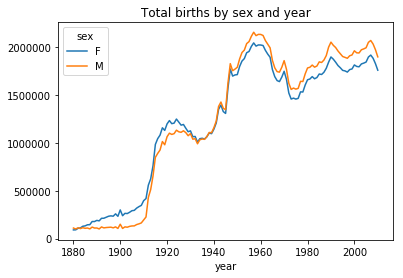

In [34]:
total_births.plot(title='Total births by sex and year')

In [96]:
def add_group(group):
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_group)
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [7]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [102]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [105]:
total_births = top1000.pivot_table(values='births', index='year', columns='name',
                                  aggfunc=sum)

F:\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [21]:
subset = total_births[['John','Harry','Mary','Marilyn']]

NameError: name 'total_births' is not defined

array([<matplotlib.axes._subplots.AxesSubplot object at 0x18706490>,
      dtype=object)

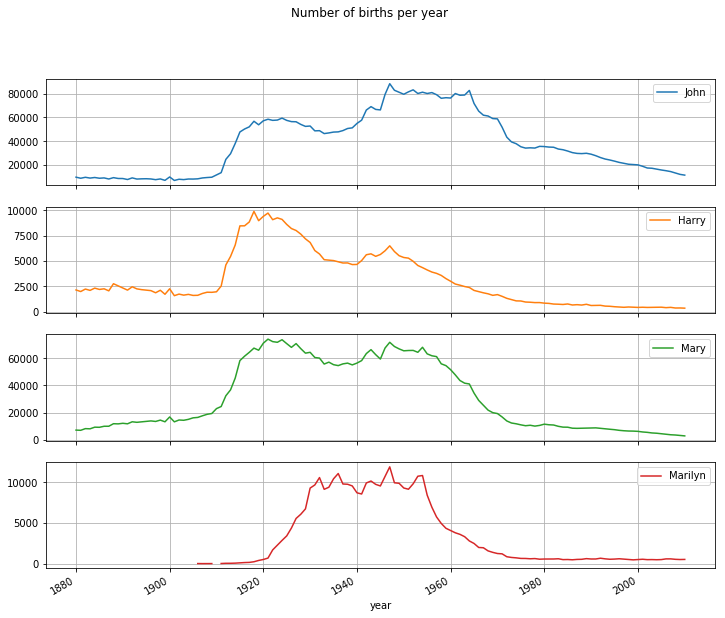

In [113]:
subset.plot(subplots=True, figsize=(12,10), grid=True, 
            title='Number of births per year')

F:\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
F:\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


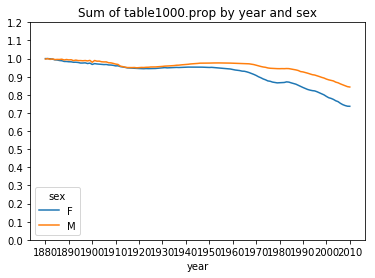

In [115]:
table = top1000.pivot_table(values='prop', index='year', columns='sex',
                           aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10))

In [8]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

In [36]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

F:\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
F:\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


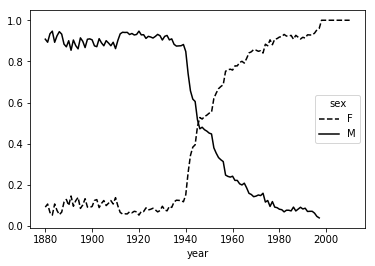

In [56]:
table = filtered.pivot_table(values='births', index='year', columns='sex',
                            aggfunc=sum)
table = table.div(table.sum(1),axis=0)
table.head()
table.plot(style={'M':'k-', 'F':'k--'})

In [74]:
tmp = ['foo','foobar','baz','qux','python','guido']*100000

In [95]:
%timeit method1 = [x for x in tmp if x.startswith('foo')]
%timeit method2 = [x for x in tmp if x[:3]=='foo']

123 ms ± 361 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
99.2 ms ± 6.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# CH4 数组array

In [18]:
data1 = [[6,75,8,0,1],[2,3,5,3,68]]
arr1 = np.array(data1)
arr1.shape

(2, 5)

In [62]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [89]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [97]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])

In [101]:
data = np.random.randn(7,4)
data

array([[ 0.34009652, -0.30245919, -0.23301808, -1.84523215],
       [-0.43214203, -0.4400779 ,  2.25244153,  0.98544466],
       [ 1.14727626,  0.69929973,  0.15867445, -0.75272308],
       [ 0.01580318,  0.22944509, -0.02346768,  0.88777725],
       [-1.36567083, -1.24239636,  0.04961528,  0.79508304],
       [-0.04147626, -0.11739893,  1.19091   , -0.52370609],
       [-0.85021804, -0.06484958, -0.68519682,  1.79124131]])

In [114]:
arr2d[[2,0,1]]

array([[7, 8, 9],
       [1, 2, 3],
       [4, 5, 6]])

In [11]:
np.info(np.modf)

modf(x[, out1, out2], / [, out=(None, None)], *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Return the fractional and integral parts of an array, element-wise.

The fractional and integral parts are negative if the given number is
negative.

Parameters
----------
x : array_like
    Input array.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or `None`,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    Values of True indicate to calculate the ufunc at that position, values
    of False indicate to leave the value in the output alone.
**kwargs
    For other keyword-only arguments, see the
    :ref:`ufunc docs <ufuncs.kwargs>`.

Returns
-------
y1 : ndarray
    Fractional part o

## 4.3 利用数组进行数据处理

In [12]:
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points,points)

In [21]:
z = np.sqrt(xs**2 + ys**2)

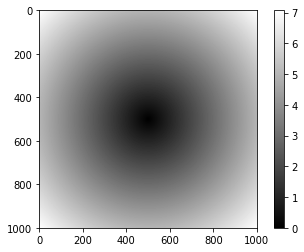

In [22]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()

### 将条件逻辑表达为数组运算

In [25]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True,False,True,True,False])

In [31]:
result = [(x if c else y) for x,y,c in zip(xarr,yarr,cond)]
print(result)

[1.1, 2.2, 1.3, 1.4, 2.5]


### 数学和统计方法

In [44]:
np.where(cond, xarr,list(yarr).append(9))

array([1.1, None, 1.3, 1.4, None], dtype=object)

In [69]:
arr = np.random.randn(8).reshape(2,4)
print(arr)

[[-1.43145043 -0.48761573 -0.4728167  -1.06771713]
 [ 1.60268643 -0.99049753 -0.51330967 -0.13493199]]


In [45]:
list(yarr).append(9)dd

In [72]:
(arr==0).any()

False

### 排序

In [74]:
arr = np.random.randn(8)
print(arr)
arr.sort()
print('arr.sort():',arr)

[-0.577453   -1.09612244  1.34006356  0.4484527   0.09134944 -0.39652251
  0.07147987  0.37640766]
arr.sort(): [-1.09612244 -0.577453   -0.39652251  0.07147987  0.09134944  0.37640766
  0.4484527   1.34006356]


### 唯一化一级其他的集合逻辑

In [77]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
sorted(set(names))

['Bob', 'Joe', 'Will']

## 4.4 用于数组的文件输入输出

In [78]:
arr = np.arange(10)
np.save('some_array',arr)

## 4.6 随机数生成

In [5]:
samples = np.random.normal(size=(4,4))

In [13]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

1.74 s ± 43.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
del samples

In [14]:
%timeit np.random.normal(size=N)

54.8 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 4.7 随机漫步

In [15]:
import random

In [23]:
position = 0 
walk = [position]
steps = 1000
for i in range(steps):
    step =1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk)

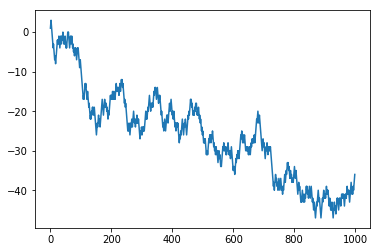

In [35]:
# 以下等同于上一步代码
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()
plt.plot(walk)

### 4.7.1 一次模拟多个随机漫步

In [40]:
nwalks = 500  #同时生成500个随机漫步
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks, nsteps))
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(1)
print(walks)

[[ -1   0   1 ...   2   1   0]
 [ -1  -2  -3 ... -60 -61 -62]
 [ -1   0  -1 ... -16 -17 -16]
 ...
 [ -1   0   1 ...   8   7   8]
 [ -1  -2  -1 ...  24  25  26]
 [  1   0  -1 ...  18  17  16]]


In [48]:
np.abs(walks>20).argmax(1)

array([  0,   0, 200, 666, 562,   0,   0, 270, 208, 456,   0,   0, 792,
         0,   0, 734,   0,   0, 520, 602, 268,   0, 500, 116,   0,   0,
       224,   0,   0, 494, 434,   0,   0, 436, 338, 326, 350,   0,   0,
         0, 272,   0, 640, 160,   0,   0, 386,   0, 118,   0, 634, 668,
         0, 508,   0, 134,   0,   0, 176,  86,   0,   0, 392,   0, 454,
         0, 888, 646,   0, 690, 114,   0, 492, 550, 736,   0, 882,   0,
       396, 262, 622, 126,   0,   0,   0,  88,   0, 360, 298,   0, 466,
       198,   0, 796,   0,   0, 210, 342,   0, 300,   0,   0,   0,   0,
         0,   0, 224,   0,   0, 588, 820,   0,   0,   0, 218, 130, 110,
       358,   0,   0,   0,  98,   0, 296,   0,   0, 744, 146,   0,   0,
       228, 220, 974, 694, 124,   0, 370, 222,   0, 912, 924, 346,   0,
       360, 578, 270,   0,   0, 208, 380,   0, 846,   0,   0, 572, 146,
         0, 546,   0,   0,   0,   0, 514, 198, 712,   0,   0, 128, 164,
       510,   0, 316,   0, 114, 166,   0, 494,   0, 460, 378, 29

# CH5 pandas入门

### Series

In [4]:
# pandas是基于numpy构建的，即使用pandas前一定要加载numpy
obj = Series([4,7,-5,3])
obj
print(obj)

0    4
1    7
2   -5
3    3
dtype: int64


In [13]:
obj2 = Series([4,7,-5,3], index=['d','b','a','c'])
obj2[['a','c']]

a   -5
c    3
dtype: int64

In [18]:
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}
states = ['Califonia','Ohio','Oregon','Texas']
obj4 = Series(sdata,index=states)
print(obj4)

Califonia        NaN
Ohio         35000.0
Oregon       16000.0
Texas        71000.0
dtype: float64


In [23]:
obj4[-obj4.isnull()]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

In [49]:
obj4.name = None
obj4

Califonia        NaN
Ohio         35000.0
Oregon       16000.0
Texas        71000.0
dtype: float64

In [53]:
tmp = Series([1,2,3], index=['a','b','b'])
tmp['b']

b    2
b    3
dtype: int64

### Dataframe

In [3]:
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
            'year':[2000,2001,2002,2001,2002],
            'pop':[1.5,1.7,3.6,2.4,2.9]}
frame = DataFrame(data)

In [5]:
DataFrame(data,columns=['year','state','pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [6]:
frame2 = DataFrame(data,columns=['year','state','pop','debt'],
                  index=['one','two','three','four','five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [7]:
frame2['debt'] = np.arange(5)

In [8]:
# series赋值
val = Series([-1.2,-1.5,-1.7], index=['two','four','five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [12]:
frame2.pivot_table(index='year', columns=['state'], values='pop')

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [21]:
# 嵌套字典的数据形式
pop = {'Nevada':{2001:2.4,2002:2.9}, 'Ohio':{2000:1.5,2001:1.7,2002:3.6}}
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [29]:
DataFrame({'Ohio':frame3['Ohio'][:],
          'Nevada':frame3['Nevada'][:2]})

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,NaN,3.6


## 5.2 pandas基本功能

In [37]:
obj = Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])

In [39]:
obj2 = obj.reindex(['a','b','c','d','e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [6]:
obj3 = Series(['blue','purple','yellow'], index=[0,2,4])
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [40]:
frame = DataFrame(np.arange(9).reshape((3,3)), index=['a','c','d'],
                 columns=['Ohio','Texas','California'])
frame2 = frame.reindex(['a','b','c','d'])

In [120]:
# dataframe同时选取行列
print(frame.loc[['a','d'],['Texas','Ohio']],'\n')

print(frame.iloc[[0,2],[1,0]],'\n')

print(frame.ix[['a','d'],[1,0]])

   Texas  Ohio
a      1     0
d      7     6 

   Texas  Ohio
a      1     0
d      7     6 

   Texas  Ohio
a      1     0
d      7     6


In [10]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


### 丢弃指定轴上的项 pd.drop()

In [5]:
obj = Series(np.arange(5), index=['a','b','c','d','e'])
new_obj = obj.drop('c')
print(new_obj)

a    0
b    1
d    3
e    4
dtype: int32


In [14]:
# 删除Dataframe 任意轴上的索引值
data = DataFrame(np.arange(16).reshape((4,4)),
                index=['Ohio','Colorado','Utah','New York'],
                columns=['one','two','three','four'])
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


### 索引、选取和过滤

In [20]:
obj = Series(np.arange(4.0), index=['a','b','c','d'])
obj['b'] == obj[1]
print(obj[2:4],'\n',obj[obj<2])

c    2.0
d    3.0
dtype: float64 
 a    0.0
b    1.0
dtype: float64


In [23]:
# 利用标签的切片运算是封闭区间（inclusive）
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [24]:
# 对于Dataframe
data = DataFrame(np.arange(16).reshape((4,4)),
                index=['Ohio','Colorado','Utah','New York'],
                columns=['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [39]:
# 需要注意的两种切片
print("--data['two']",'\n',data['two'],'\n')
print("--data['Ohio']",'\n',data.ix['Ohio'],'\n')
print("--data[:2]",'\n',data[:2],'\n')

--data['two'] 
 Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32 

--data['Ohio'] 
 one      0
two      1
three    2
four     3
Name: Ohio, dtype: int32 

--data[:2] 
           one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7 



### 5.2.2 算数运算和数据对齐

In [5]:
df1 = DataFrame(np.arange(9).reshape((3,3)),
                columns=list('bcd'),index=['Ohio','Texas','Colorado'])
df2 = DataFrame(np.arange(12).reshape((4,3)),
               columns=list('bde'), index=['Utah','Ohio','Texas','Oregon'])

In [11]:
#  对于Dataframe，对齐操作会同时发生在行和列上，对不齐的用NaN填充
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


#### 5.2.2.1 在算术方法中填充值

In [14]:
#  为了改用其他值填充，使用add函数
df1 = DataFrame(np.arange(12).reshape((3,4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20).reshape((4,5)), columns=list('abcde'))

In [15]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [33]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0,1,2,3,0
1,4,5,6,7,0
2,8,9,10,11,0


### 5.2.2 Daraframe和Series之间的运算

In [2]:
# 主要讲述沿行、列广播，具体内容在12章
Series(range(3),index=list('bde'))

b    0
d    1
e    2
dtype: int64

### 5.2.3 函数应用和映射

In [3]:
# np.ufuncs
frame = DataFrame(np.random.randn(4,3), columns=list('bde'),
                 index=['Utah','Ohio','Texas','Oregon'])
print(frame)
print(np.abs(frame))

               b         d         e
Utah   -0.056755  0.278498 -0.716740
Ohio    1.989788 -1.414077  0.465940
Texas  -0.939080  0.998015 -0.316571
Oregon -0.984098 -0.783981 -1.920337
               b         d         e
Utah    0.056755  0.278498  0.716740
Ohio    1.989788  1.414077  0.465940
Texas   0.939080  0.998015  0.316571
Oregon  0.984098  0.783981  1.920337


In [6]:
# 将函数应用到由各列或行所形成的一维数组上
f = lambda x:x.max()-x.min()
frame.apply(f, axis=0)
frame.apply(f, axis=1)

Utah      0.995238
Ohio      3.403865
Texas     1.937096
Oregon    1.136356
dtype: float64

In [16]:
tmp = Series(range(3),index=list('bde'))

In [17]:
frame.append(tmp,ignore_index=True)

,b,d,e
0,-0.056755,0.278498,-0.716740
1,1.989788,-1.414077,0.465940
2,-0.939080,0.998015,-0.316571
3,-0.984098,-0.783981,-1.920337
4,0.000000,1.000000,2.000000


In [18]:
def f(x):
    return Series([x.min(),x.max()], index=['min','max'])
frame.apply(f)

,b,d,e
min,-0.984098,-1.414077,-1.920337
max,1.989788,0.998015,0.465940


In [20]:
frame.round(2)

,b,d,e
Utah,-0.06,0.28,-0.72
Ohio,1.99,-1.41,0.47
Texas,-0.94,1.00,-0.32
Oregon,-0.98,-0.78,-1.92


In [25]:
# Series应用元素级函数的map方法
format = lambda x:'%.2f' % x
frame.applymap(format)
frame['e'].map(format)

Utah      -0.72
Ohio       0.47
Texas     -0.32
Oregon    -1.92
Name: e, dtype: object

### 5.2.4 排序和排名

In [29]:
obj = Series(range(4),index=list('dabc'))

In [31]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [53]:
frame = DataFrame(np.arange(8).reshape((2,4)), index=['three','one'],
                 columns=list('dabc'))
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [33]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [42]:
frame.sort_index(axis=1,ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [48]:
obj = Series([4,7,-3,np.NAN,2])
obj.sort_values()

2   -3.0
4    2.0
0    4.0
1    7.0
3    NaN
dtype: float64

In [54]:
frame = DataFrame({'b':[4,7,-3,2],'a':[0,1,0,1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [55]:
print(frame.sort_index(by='b'))
print(frame.sort_values(by='b'))

   a  b
2  0 -3
3  1  2
0  0  4
1  1  7
   a  b
2  0 -3
3  1  2
0  0  4
1  1  7


F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if __name__ == '__main__':


In [57]:
frame.sort_index(by=['a','b'])

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if __name__ == '__main__':


,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [60]:
# 排名 rank()
obj=Series([7,-5,7,4,2,0,4])
obj.rank()
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [68]:
obj.rank(method='max')

0    7.0
1    1.0
2    7.0
3    5.0
4    3.0
5    2.0
6    5.0
dtype: float64

### 带有重复值的轴索引

In [69]:
obj = Series(range(5),index=list('aabbc'))
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [74]:
obj.index.is_unique

False

In [75]:
obj['a']

a    0
a    1
dtype: int64

In [76]:
# dataframe的重复轴索引
df = DataFrame(np.random.randn(4,3),index=list('aabb'))
df

,0,1,2
a,0.324885,0.974841,-1.031155
a,0.375039,-1.093620,-0.474708
b,1.776414,-1.372668,0.095003
b,0.624686,0.115623,0.823322


In [80]:
df.ix['a']

,0,1,2
a,0.324885,0.974841,-1.031155
a,0.375039,-1.093620,-0.474708


## 5.3 汇总和计算描述统计

In [18]:
df = DataFrame([[1.4,np.NAN],
                [7.1,-4.5],
                [np.NAN,np.NAN],
                [0.75,-1.3]],
              index=list('abcd'),
              columns=['one','two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [13]:
df.sum(axis=1,skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [22]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [24]:
# 非数值型数据的汇总统计
obj = Series(['a','a','b','c']*2)
obj

0    a
1    a
2    b
3    c
4    a
5    a
6    b
7    c
dtype: object

In [25]:
obj.describe()

count     8
unique    3
top       a
freq      4
dtype: object

### 5.3.1 相关系数与协方差

In [3]:
import pandas_datareader as web
all_data = {}
for ticker in ['AAPL','IBM','MSFT','GOOG']:
    all_data[ticker]=web.get_data_yahoo(ticker,'1/1/2000','1/1/2010')

ImmediateDeprecationError: 
Yahoo Actions has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


### 5.3.2 唯一值、值技术以及成员资格

In [21]:
obj = Series(list('cadaabbcc'))
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [25]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [27]:
pd.value_counts(obj,sort=False)

b    2
c    3
a    3
d    1
dtype: int64

In [28]:
obj.isin(['b','a'])

0    False
1     True
2    False
3     True
4     True
5     True
6     True
7    False
8    False
dtype: bool

In [2]:
data = DataFrame({'Qu1':[1,3,4,3,4],
                 'Qu2':[2,3,1,2,3],
                 'Qu3':[1,5,2,4,4]})

In [40]:
data.apply(pd.value_counts,axis=0)

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [39]:
pd.value_counts([1,3,4,3,4])

4    2
3    2
1    1
dtype: int64

## 5.4 处理缺失数据

In [2]:
data = DataFrame({'Qu1':[1,3,None,3,4],
                 'Qu2':[2,3,1,2,None],
                 'Qu3':[1,5,2,4,4]})

In [3]:
data.isnull()

,Qu1,Qu2,Qu3
0,False,False,False
1,False,False,False
2,True,False,False
3,False,False,False
4,False,True,False


In [5]:
data.dropna(axis=0, how='any')

,Qu1,Qu2,Qu3
0,1.0,2.0,1
1,3.0,3.0,5
3,3.0,2.0,4


### 5.4.1滤除缺失数据

In [7]:
data = Series([1,None,3.5,None,7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [10]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [12]:
# 对于dataframe滤除na
data = DataFrame([[1,6.5,3],[1,None,None],
                 [None,np.NAN,np.nan],[None,6.5,3]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [20]:
# 涉及时间序列数据的dataframe
df = DataFrame(np.random.randn(7,3))
df

,0,1,2
0,-1.276734,1.253866,0.116421
1,0.470828,0.845429,0.158700
2,-1.581958,0.045827,-0.698956
3,1.964167,-1.981120,-0.471406
4,0.189433,0.285067,-0.556890
5,-0.100310,-2.173902,0.506158
6,1.255040,1.274036,1.239821


In [22]:
df.ix[:4,1]=np.NAN
df.ix[:2,2]=None
df

,0,1,2
0,-1.276734,NaN,NaN
1,0.470828,NaN,NaN
2,-1.581958,NaN,NaN
3,1.964167,NaN,-0.471406
4,0.189433,NaN,-0.556890
5,-0.100310,-2.173902,0.506158
6,1.255040,1.274036,1.239821


In [25]:
df.dropna(thresh=2)

,0,1,2
3,1.964167,NaN,-0.471406
4,0.189433,NaN,-0.556890
5,-0.100310,-2.173902,0.506158
6,1.255040,1.274036,1.239821


### 5.4.2 填充缺失数据

In [44]:
df = DataFrame(np.random.randn(7,3))
df.ix[:4,1]=np.NAN
df.ix[:2,2]=None
df

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


,0,1,2
0,-1.042787,NaN,NaN
1,1.306921,NaN,NaN
2,0.696652,NaN,NaN
3,-0.578135,NaN,1.961418
4,1.038378,NaN,0.790958
5,0.049713,0.126773,-0.188798
6,0.896178,-2.271745,-0.302686


In [9]:
df.fillna({1:.5,3:-1})

,0,1,2
0,-0.984150,0.500000,NaN
1,0.250102,0.500000,NaN
2,-0.008286,0.500000,NaN
3,0.996738,0.500000,2.472436
4,0.898255,0.500000,0.209427
5,-0.100522,0.639011,-1.147821
6,-0.173129,-0.599170,-0.361780


In [48]:
df.fillna(method='bfill',limit=2)

,0,1,2
0,-1.042787,NaN,NaN
1,1.306921,NaN,1.961418
2,0.696652,NaN,1.961418
3,-0.578135,0.126773,1.961418
4,1.038378,0.126773,0.790958
5,0.049713,0.126773,-0.188798
6,0.896178,-2.271745,-0.302686


In [42]:
tmp = DataFrame()
for i in np.arange(len(df.columns)):
    tmp[i] = df[i].fillna(df[i].mean())
tmp

,0,1,2
0,-1.057592,-0.323525,-0.277016
1,0.949885,-0.323525,-0.277016
2,-0.571363,-0.323525,-0.277016
3,0.125422,-0.323525,1.862468
4,-0.442573,-0.323525,-1.208059
5,-0.544920,-0.652697,-0.389223
6,1.043341,0.005648,-1.373251


In [47]:
tmp = DataFrame()
i=0
while i < len(df.columns):
    tmp[i] = df[i].fillna(df[i].mean())
    i = i+1
tmp

,0,1,2
0,-1.042787,-1.072486,0.565223
1,1.306921,-1.072486,0.565223
2,0.696652,-1.072486,0.565223
3,-0.578135,-1.072486,1.961418
4,1.038378,-1.072486,0.790958
5,0.049713,0.126773,-0.188798
6,0.896178,-2.271745,-0.302686


## 5.5 层次化索引

In [49]:
# 索引可以以低纬度形式处理高纬度数据
data = Series(np.random.randn(10),
             index=[['a','a','a','b','b','b','c','c','d','d'],
                    [1,2,3,1,2,3,1,2,2,3]])
data            

a  1   -0.146664
   2    0.938297
   3    1.223966
b  1   -0.168039
   2   -0.653281
   3    0.324255
c  1    1.820438
   2    2.005631
d  2    2.768431
   3   -1.830423
dtype: float64

In [53]:
data.ix[['b','d']]

b  1   -0.168039
   2   -0.653281
   3    0.324255
d  2    2.768431
   3   -1.830423
dtype: float64

In [54]:
data.ix['b',2]

-0.653281256533322

In [57]:
# unstack转化为dataframe
data.unstack()

,1,2,3
a,-0.146664,0.938297,1.223966
b,-0.168039,-0.653281,0.324255
c,1.820438,2.005631,NaN
d,NaN,2.768431,-1.830423


In [58]:
data.unstack().stack()

a  1   -0.146664
   2    0.938297
   3    1.223966
b  1   -0.168039
   2   -0.653281
   3    0.324255
c  1    1.820438
   2    2.005631
d  2    2.768431
   3   -1.830423
dtype: float64

In [64]:
# 对于dataframe，每条轴都可以有分层索引
frame = DataFrame(np.arange(12).reshape((4,3)),
                 index=[['a','a','b','b'],[1,2,1,2]],
                 columns=[['Ohio','Ohio','Colorado'],['Green','Red','Green']]
                 )
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [8]:
# 索引名称 和 轴标签名的区别
frame.index.names = ['key1','key2']
frame.columns.names = ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [87]:
frame.ix['b','Ohio']

color,Green,Red
key2,,
1,6,7
2,9,10


In [23]:
# 创建multiIndex
multiindex = pd.MultiIndex.from_arrays([['Ohio','Ohio','Colorado'],
                       ['Green','Red','Green']]
                     ,names=['state','color'])
DataFrame(np.arange(12).reshape((4,3)),columns=multiindex)

state  Ohio     Colorado
color Green Red    Green
0         0   1        2
1         3   4        5
2         6   7        8
3         9  10       11

### 5.5.1 重排分级顺序

In [13]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [18]:
frame.swaplevel(0,1).sortlevel(0)

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  if __name__ == '__main__':


state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [27]:
frame.swaplevel(0,1).sort_index()

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [40]:
frame.sortlevel(1)

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  if __name__ == '__main__':


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

### 5.5.2 根据级别汇总统计

In [51]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [54]:
frame.sum(level='color',axis=1)
# 其实是利用了groupby功能

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 5.5.3 使用Dataframe的列

In [69]:
frame = DataFrame({'a':range(7)
                   ,'b':range(7,0,-1)
                   ,'c':['one','one','one','two','two','two','two']
                   ,'d':[0,1,2,0,1,2,3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [100]:
frame2 = frame.set_index(['c','d'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [103]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [101]:
frame.set_index(['c','d'],drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

## 5.6 其他有关pandas的话题

### 5.6.1 整数索引

In [9]:
ser = Series(np.arange(3))
Series(range(3))-ser

0    0
1    0
2    0
dtype: int64

In [11]:
ser2 = Series(range(3),index=list('abc'))
ser2[-1]

2

In [14]:
ser.ix[:1]

0    0
1    1
dtype: int32

### 5.6.2 面板数据

In [ ]:
# pandas的Panel数据结构，可看作一个三维版的Dataframe


# CH6 数据加载、存储与文件格式

### 6.1.1 逐块读取文本文件

In [6]:
result = pd.read_csv('D:/Python3.6/Jupyter/pydata-book-2nd-edition/examples/ex6.csv',nrows=10)
result

In [10]:
# 逐块读取文件，需设置chunksize
chunker = pd.read_csv('D:/Python3.6/Jupyter/pydata-book-2nd-edition/examples/ex6.csv',chunksize=1000)
chunker

In [23]:
# 再将值计数聚合到key列
tot = Series([])
for pieces in chunker:
    tot = tot.add(pieces['key'].value_counts(),fill_value=0)
tot = tot.sort_values(ascending=False)
type(tot)

pandas.core.series.Series

### 6.1.2 将数据写出到文本格式

### 6.1.3 JSON数据

In [12]:
import json
obj = '''
{"name":"Wes",
"places_lived":["United States","Spain","Germany"],
"pet":null,
"sblings":[{"name":"Scott","age":25,"pet":"Zuko"},
            {"name":"Katie","age":33,"pet":"Cisco"}]
}
'''

In [16]:
# 将json字符串转化为python对象
result = json.loads(obj)
result

{'name': 'Wes',
 'pet': None,
 'places_lived': ['United States', 'Spain', 'Germany'],
 'sblings': [{'age': 25, 'name': 'Scott', 'pet': 'Zuko'},
  {'age': 33, 'name': 'Katie', 'pet': 'Cisco'}]}

In [17]:
# 将python对象转化为json格式
asjson = json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "sblings": [{"name": "Scott", "age": 25, "pet": "Zuko"}, {"name": "Katie", "age": 33, "pet": "Cisco"}]}'

In [31]:
# 将json转化为dataframe
siblings = DataFrame(result['sblings'],columns=['name','age'])
siblings

,name,age
0,Scott,25
1,Katie,33


### 6.1.4 XML和HTML：Web信息收集

In [5]:
from lxml.html import parse
import urllib

In [7]:
parsed = parse(urllib.request.urlopen('http://finance.yahoo.com/q/op?s=AAPL+Options'))
parsed

In [9]:
doc = parsed.getroot()
doc

<Element html at 0x2d2001625e8>

In [10]:
# xml内容根据实际需求，后期再加以学习，现阶段跳过

## 6.2 二进制数据格式

In [15]:
frame = pd.read_csv('D:\Python3.6\Jupyter\pydata-book-2nd-edition\examples\ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### 6.2.1 使用HDF5格式

In [2]:
# hierarchical data format,层次型数据格式
# 每个HDF5文件都包含一个文件系统式的节点结构，可以存储多个数据集并支持元数据
# 特点：支持多种压缩器的即时压缩，更高效地存储重复模式数据
# 因此：对于特别大、无法直接放入内存的数据集，建议使用HDF5从而高效地分块读写
# Python中的2个HDF5接口：
# 1、h5py（直接而高级的hdf5 API访问接口）
# 2、PyTables（提供灵活的数据容器、表索引、查询以及核外计算计数）

In [8]:
store = pd.HDFStore('D:\\Python3.6\\Jupyter\\pydata-book-2nd-edition\\examples\\mydata.h5')
type(store)

pandas.io.pytables.HDFStore

In [16]:
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: D:\Python3.6\Jupyter\pydata-book-2nd-edition\examples\mydata.h5
/obj1                frame        (shape->[3,5])
/obj1_col            series       (shape->[3])  

In [18]:
store['obj1_col']

0    1
1    5
2    9
Name: a, dtype: int64

In [19]:
######### hdf5适用于“一次写多次读”的数据集，即cpu密集型 ##########

## 6.3 使用HTML和Web API

In [2]:
# 抓包
import requests, json

## 6.4 使用数据库

In [8]:
# Python内置sqlite3驱动器,一定要大写。。。。
import sqlite3
query = """
create table test
(a VARCHAR(20),
b VARCHAR(20),
c REAL,
d INTEGER);
"""
con = sqlite3.connect(':memory:')
con.execute(query)
con.commit()

In [9]:
# 插入数据
data = [('Atlanta','Georgia',1.25,6),
       ('Tallahasse','Florida',2.6,3),
       ('Sacramento','California',1.7,5)]
stmt = 'INSERT into test VALUES(?,?,?,?)'

con.executemany(stmt,data)
con.commit()

In [10]:
cursor = con.execute('select * from test')
cursor

In [11]:
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahasse', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [12]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [19]:
# 存储为dataframe
DataFrame(rows,columns=list(zip(*cursor.description))[0])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahasse,Florida,2.60,3
2,Sacramento,California,1.70,5


In [22]:
# 或者直接是用pandas.io.sql模块,直接读取为dataframe
import pandas.io.sql as sql
sql.read_sql_query('select * from test',con)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahasse,Florida,2.60,3
2,Sacramento,California,1.70,5


### 6.4.1 存取MongoDB中的数据

# CH7 数据清理、转换、合并、重塑

## 7.1 合并数据集

In [25]:
# pd.concat,轴向链接； pd.merge,横向链接,类似sql

### 7.1.1 数据库风格的Dataframe合并

In [8]:
# pd.merge
df1 = DataFrame({'key':['b','b','a','c','a','a','b'],
                'data1':range(7)})
print('df1:\n',df1,'\n')
df2 = DataFrame({'key':['a','b','d'],
                'data2':range(3)})
print('df2:\n',df2)

df1:
    data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b 

df2:
    data2 key
0      0   a
1      1   b
2      2   d


In [13]:
pd.merge(df1,df2)
# 默认基于重名列当作键

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [12]:
pd.merge(df1,df2,on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [14]:
# 列名不同，也可以分别指定
df3 = DataFrame({'lkey':['b','b','a','c','a','a','b'],
                'data1':range(7)})
print('df3:\n',df3,'\n')
df4 = DataFrame({'rkey':['a','b','d'],
                'data2':range(3)})
print('df4:\n',df4)

df3:
    data1 lkey
0      0    b
1      1    b
2      2    a
3      3    c
4      4    a
5      5    a
6      6    b 

df4:
    data2 rkey
0      0    a
1      1    b
2      2    d


In [16]:
pd.merge(df3,df4,left_on='lkey',right_on='rkey')
# inner链接

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [18]:
pd.merge(df1,df2,how='outer')
# 外（全）链接

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [21]:
df1 = DataFrame({'key':['b','b','a','c','a','b'],
                'data1':range(6)})
df2 = DataFrame({'key':['a','b','a','b','d'],
                'data2':range(5)})
print('df1:\n',df1,'\n\ndf2:\n',df2)

df1:
    data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b 

df2:
    data2 key
0      0   a
1      1   b
2      2   a
3      3   b
4      4   d


In [22]:
pd.merge(df1,df2,how='right',on='key')

,data1,key,data2
0,0.0,b,1
1,1.0,b,1
2,5.0,b,1
3,0.0,b,3
4,1.0,b,3
5,5.0,b,3
6,2.0,a,0
7,4.0,a,0
8,2.0,a,2
9,4.0,a,2


In [23]:
# 根据多个键进行合并，则传入一个由列名的列表即可
left = DataFrame({'key1':['foo','foo','bar'],
                 'key2':['one','two','one'],
                 'lval':[1,2,3]})
right = DataFrame({'key1':['foo','foo','bar','bar'],
                  'key2':['one','one','one','two'],
                  'rval':[4,5,6,7]})
print('left:\n',left,'\n\nright:\n',right)

left:
   key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3 

right:
   key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7


In [25]:
pd.merge(left,right,on=['key1','key2'],how='outer')
# 可以看成多个键形成一个tuple，两侧表分别去匹配数据

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [26]:
pd.merge(left,right,on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [28]:
pd.merge(left,right,on='key1',suffixes=['_left','_right'])

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### 7.1.2 索引上的合并

In [7]:
left1 = DataFrame({'key':['a','b','a','a','b','c'],
                 'value':range(6)})
right1 = DataFrame({'group_val':[3.5,7]},
                  index=['a','b'])
print('left1:\n',left1,'\n\nright1:\n',right1)

left1:
   key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5 

right1:
    group_val
a        3.5
b        7.0


In [3]:
pd.merge(left1,right1,left_on='key',right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [8]:
lefth = DataFrame({'key1':['Ohio','Ohio','Ohio','Nevada','Nevada'],
                  'key2':[2000,2001,2002,2001,2002],
                  'data':np.arange(5)})
righth = DataFrame(np.arange(12).reshape((6,2)),
                  index=[['Nevada','Nevada','Ohio','Ohio','Ohio','Ohio'],
                         [2000,2000,2000,2000,2001,2002]],
                  columns=['event1','event2'])
print('lefth:\n',lefth,'\n\nrighth:\n',righth)

lefth:
    data    key1  key2
0     0    Ohio  2000
1     1    Ohio  2001
2     2    Ohio  2002
3     3  Nevada  2001
4     4  Nevada  2002 

righth:
              event1  event2
Nevada 2000       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11


In [10]:
# 层次化索引情况下，on需要对应数量的columns
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True,how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,NaN,NaN
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,0.0,1.0
4,NaN,Nevada,2000,2.0,3.0


### 7.1.3 轴向连接

In [2]:
# 轴即横向、竖向
# 方法1：用于合并原始np数组，np.concatenate
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
np.concatenate([arr,arr],axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
# 方法2：pd.concat
s1 = Series([0,1],index=list('ab'))
s2 = Series([2,3,4],index=list('cde'))
s3 = Series([5,6],index=list('fg'))

In [18]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [19]:
pd.concat([s1,s3,s2],axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,NaN,2.0
d,NaN,NaN,3.0
e,NaN,NaN,4.0
f,NaN,5.0,NaN
g,NaN,6.0,NaN


In [14]:
s4 = pd.concat([s1*5,s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [23]:
pd.concat([s4,s1],join='inner',axis=1)

,0,1
a,0,0
b,5,1


In [28]:
# 通过join_axes指定要在其他轴上使用的索引
pd.concat([s1,s4],axis=1,join_axes=[list('acbe')])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [32]:
result1 = pd.concat([s1,s1,s3],keys=['one','two','three'])
result2 = pd.concat([s1,s1,s3],keys=['one','two','three'],axis=1)
print('result1:\n',result1,'\n\nresult2:\n',result2)

result1:
 one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64 

result2:
    one  two  three
a  0.0  0.0    NaN
b  1.0  1.0    NaN
f  NaN  NaN    5.0
g  NaN  NaN    6.0


In [37]:
df1 = DataFrame(np.arange(6).reshape((3,2)),index=list('abc'),
               columns=['one','two'])
df2 = DataFrame(5+np.arange(4).reshape((2,2)),index=list('ac'),
               columns=['three','four'])
pd.concat([df1,df2],axis=1,keys=['level1','level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [42]:
# 当无index索引时
df1 = DataFrame(np.random.randn(3,4),columns=list('abcd'))
df2 = DataFrame(np.random.randn(2,3),columns=list('bda'))
print(pd.concat([df1,df2]),'\n\n'
     ,pd.concat([df1,df2],ignore_index=True))

          a         b         c         d
0  0.077646  1.021611  2.146749  0.887037
1  1.225795 -0.144227  1.309598  0.721751
2 -1.436384 -1.161391 -0.194283 -1.580717
0  0.510400 -0.485936       NaN  0.340379
1 -0.471491 -0.418570       NaN -0.022029 

           a         b         c         d
0  0.077646  1.021611  2.146749  0.887037
1  1.225795 -0.144227  1.309598  0.721751
2 -1.436384 -1.161391 -0.194283 -1.580717
3  0.510400 -0.485936       NaN  0.340379
4 -0.471491 -0.418570       NaN -0.022029


### 7.1.4 合并重叠数据

In [3]:
a = Series([np.nan,2.5,np.nan,3.5,4.5,np.nan],
          index=list('fedcba'))
b = Series(np.arange(len(a),dtype=np.float64),
          index=list('fedcba'))
b[-1] = np.nan

In [7]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [12]:
# combine_first的具体用法
df1 = DataFrame({'a':[1,np.nan,5,np.nan]
                ,'b':[np.nan,2,np.nan,6]
                ,'c':range(2,18,4)})
df2 = DataFrame({'a':[5,4,np.nan,3,7]
                ,'b':[np.nan,3,4,6,8]})

In [16]:
df1.combine_first(df2)
# 其实就是2个数据集合并的过程中，用df2填充df1对应位置的NA

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 7.2 重塑和轴向旋转

In [2]:
### reshape & pivot

### 7.2.1 重塑层次化索引

In [12]:
# stack：列转行，类型变为series
# unstack：行转列
df = DataFrame(np.arange(6).reshape((2,3))
              ,index=pd.Index(['Ohio','Colorado'],name='state')
              ,columns=pd.Index(['one','two','three'],name='number')
              )
df

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [13]:
result = df.stack()
print(result,'\n\n',type(result))

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32 

 <class 'pandas.core.series.Series'>


In [26]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [25]:
result.unstack('number')

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [29]:
s1 = Series(np.random.randn(4),index=list('abcd'))
s2 = Series(np.random.randn(3),index=list('cde'))
ss = pd.concat([s1,s2],keys=['one','two'])
ss

one  a    0.136262
     b    2.635446
     c   -1.054760
     d    2.091906
two  c    1.131645
     d   -2.023488
     e   -0.493441
dtype: float64

In [32]:
ss.unstack()

,a,b,c,d,e
one,0.136262,2.635446,-1.054760,2.091906,NaN
two,NaN,NaN,1.131645,-2.023488,-0.493441


In [37]:
# 对dataframe进行unstack
df = DataFrame({'left':result
               ,'right':result+5}
              ,columns=pd.Index(['left','right'],name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [49]:
print(df.columns,'\n\n',df.index)

Index(['left', 'right'], dtype='object', name='side') 

 MultiIndex(levels=[['Ohio', 'Colorado'], ['one', 'two', 'three']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['state', 'number'])


In [42]:
df.unstack()

side     left           right          
number    one two three   one two three
state                                  
Ohio        0   1     2     5   6     7
Colorado    3   4     5     8   9    10

In [51]:
df.unstack('number')

side     left           right          
number    one two three   one two three
state                                  
Ohio        0   1     2     5   6     7
Colorado    3   4     5     8   9    10

### 7.2.2 “长格式”转“宽格式”

In [ ]:
# 时间序列数据通常是长格式
# pd.pivot：一个快捷方式=用set_index创建层次化索引，再用unstack重塑

In [53]:
DataFrame.set_index?

## 7.3 数据转换

In [54]:
# 本节主要关于过滤、清理以及其他转换工作

### 7.3.1 移除重复数据

In [17]:
df = DataFrame({'k1':['one']*3+['two']*4
               ,'k2':[1,1,2,3,3,4,4]})
df

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [18]:
print(df[-df.duplicated()],'\n\n',df.drop_duplicates(keep=False))

    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4 

     k1  k2
2  one   2


In [19]:
df.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [20]:
# 根据指定列过滤重复项
df['v1'] = range(7)
print(df,'\n\n',df.drop_duplicates('k1'))

    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6 

     k1  k2  v1
0  one   1   0
3  two   3   3


In [21]:
df.drop_duplicates(['k1','k2'],keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### 7.3.2 利用函数或映射进行数据转换

In [22]:
df = DataFrame({'food':['bacon','pulled pork','bacon','Pastrami','corned beef','Bacon','pastrami','honey ham','nova lox']
               ,'ounces':[4,3,12,6,7.5,8,3,5,6]})
df

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [24]:
# series的map方法可以接受一个函数或含有映射关系的字典型对象{}
meat_to_animal = {'bacon':'pig'
                 ,'pulled pork':'pig'
                 ,'pastrami':'cow'
                 ,'corned beef':'cow'
                 ,'honey ham':'pig'
                 ,'nova lox':'salmon'}
df['animal'] = df['food'].map(str.lower).map(meat_to_animal)
df

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [29]:
# map方法的妙用 
df['food'].map(lambda x:meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### 7.3.3 替换值

In [2]:
df = Series([1,-999,2,-999,-1000,3])

In [4]:
df.replace([-999,333],np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [5]:
df.replace({-999:np.nan,333:0})

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

### 7.3.4 重命名轴索引

In [2]:
df = DataFrame(np.arange(12).reshape((3,4))
              ,index=['Ohio','Colorado','New York']
              ,columns=['one','two','three','four'])

In [8]:
df.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [16]:
# 更实用的方法rename，对索引和列都可用；既能复制dataframe，又能更改行列名
df.rename(index=str.title,columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [17]:
df.rename(index={'Ohio':'Indiana'}
         ,columns={'three':'peekaboo'})

,one,two,peekaboo,four
Indiana,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


### 7.3.5 离散化和面元划分

In [20]:
# 连续数据常常被离散化或拆分为“面元”（bin）以便分析
ages = [20,22,25,27,21,23,3,31,61,45,41,32]
bins = [18,25,35,60,100]
cats = pd.cut(ages,bins,right=False)
cats

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [33]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     2
(60, 100]    1
dtype: int64

In [34]:
pd.cut(ages,bins,labels=['Youth','YoungAdult','MiddleAged','Senior'])

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [36]:
# 传入希望切分的bin数量
df = np.random.rand(20)

In [45]:
pd.cut(df,4,precision=2)

[(0.0053, 0.25], (0.5, 0.74], (0.74, 0.99], (0.5, 0.74], (0.5, 0.74], ..., (0.0053, 0.25], (0.5, 0.74], (0.0053, 0.25], (0.74, 0.99], (0.0053, 0.25]]
Length: 20
Categories (4, interval[float64]): [(0.0053, 0.25] < (0.25, 0.5] < (0.5, 0.74] < (0.74, 0.99]]

In [51]:
# qcut(),使用样本分位数,使每个bin含有相等数量的数据点
df = np.random.randn(1000)
cats = pd.qcut(df,4)
cats

[(-0.639, 0.0256], (-0.639, 0.0256], (-0.639, 0.0256], (-0.639, 0.0256], (0.0256, 0.672], ..., (0.672, 3.277], (0.672, 3.277], (0.672, 3.277], (-0.639, 0.0256], (0.0256, 0.672]]
Length: 1000
Categories (4, interval[float64]): [(-2.843, -0.639] < (-0.639, 0.0256] < (0.0256, 0.672] < (0.672, 3.277]]

In [52]:
pd.value_counts(cats)

(0.672, 3.277]      250
(0.0256, 0.672]     250
(-0.639, 0.0256]    250
(-2.843, -0.639]    250
dtype: int64

In [59]:
# qcut自定义分位数(0到1之间的数值，包含断点)
pd.qcut(df,[0,0.1,0.5,0.9,1])

[(-1.209, 0.0256], (-1.209, 0.0256], (-1.209, 0.0256], (-1.209, 0.0256], (0.0256, 1.173], ..., (0.0256, 1.173], (0.0256, 1.173], (0.0256, 1.173], (-1.209, 0.0256], (0.0256, 1.173]]
Length: 1000
Categories (4, interval[float64]): [(-2.843, -1.209] < (-1.209, 0.0256] < (0.0256, 1.173] < (1.173, 3.277]]

In [61]:
pd.qcut(df,[0,0.1,0.5,0.9,1]).value_counts()

(-2.843, -1.209]    100
(-1.209, 0.0256]    400
(0.0256, 1.173]     400
(1.173, 3.277]      100
dtype: int64

### 7.3.6 检测和过滤异常值

In [2]:
np.random.seed(12345)
df = DataFrame(np.random.randn(1000,4))
df.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [3]:
# 选出第4列绝对值超过3的值
col = df[3]
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [4]:
(df[np.abs(df)>3]).describe()

,0,1,2,3
count,2.000000,1.000000,5.000000,3.000000
mean,-0.030814,-3.548824,0.688967,-1.072380
std,4.804706,NaN,3.478158,4.333503
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-1.729534,-3.548824,-3.056990,-3.572334
50%,-0.030814,-3.548824,3.176873,-3.399312
75%,1.667906,-3.548824,3.248944,0.264108
max,3.366626,-3.548824,3.260383,3.927528


In [24]:
df[(np.abs(df)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [29]:
df[np.abs(df)>3] = np.sign(df)*3
df.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### 7.3.7 排列和随机采样

In [34]:
# np.random.permutation 随机重排序，每次运行都会刷新排序
df = DataFrame(np.arange(20).reshape((5,4)))
sampler = np.random.permutation(5)
sampler

array([1, 0, 4, 3, 2])

In [35]:
print(df.take(np.random.permutation(5)),'\n\n'
     ,df.take(np.random.permutation(5)))

    0   1   2   3
1   4   5   6   7
4  16  17  18  19
0   0   1   2   3
2   8   9  10  11
3  12  13  14  15 

     0   1   2   3
0   0   1   2   3
3  12  13  14  15
2   8   9  10  11
4  16  17  18  19
1   4   5   6   7


In [36]:
?df.take

In [47]:
np.random.permutation(len(df))[:3]

array([3, 4, 2])

In [48]:
bag = np.array([5,7,-1,6,4])
sampler = np.random.randint(0,len(bag),size=10)
sampler

array([3, 2, 1, 2, 0, 4, 4, 4, 3, 4])

### 7.3.8 计算指标/哑变量

In [26]:
# 将分类变量转换为“哑变量矩阵” or “指标矩阵”
# 如果dataframe的某一列有k个不同的值，则可以派生出一个k列01矩阵
# pd.get_dummies
df = DataFrame({'key1':['b','b','a','c','a','b']
               ,'key2':['b','a','b','b','a','c']
               ,'data1':range(6)})
pd.get_dummies(df['key1'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [33]:
?pd.get_dummies

In [52]:
dummies = pd.get_dummies(df['key1'],prefix='key1',prefix_sep='_')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key1_a,key1_b,key1_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [53]:
 pd.get_dummies(df.loc[:,['key1','key2']],prefix=['key1','key2'],prefix_sep='_')

,key1_a,key1_b,key1_c,key2_a,key2_b,key2_c
0,0,1,0,0,1,0
1,0,1,0,1,0,0
2,1,0,0,0,1,0
3,0,0,1,0,1,0
4,1,0,0,1,0,0
5,0,1,0,0,0,1


In [50]:
pd.get_dummies(df,prefix=['key1','key2'],prefix_sep='_')

,data1,key1_a,key1_b,key1_c,key2_a,key2_b,key2_c
0,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0
2,2,1,0,0,0,1,0
3,3,0,0,1,0,1,0
4,4,1,0,0,1,0,0
5,5,0,1,0,0,0,1


In [35]:
# 某行同属多个分类的情况。。。
mnames = ['movid_id','title','genres']
movies = pd.read_table('pydata-book-2nd-edition\\datasets\\movielens\\movies.dat'
                      ,sep='::',header=None,names=mnames)
movies.head()

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,movid_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
# genres 转化为 哑变量
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [55]:
# 从一个全零dataframe构建指标dataframe
dummies = DataFrame(np.zeros((len(movies),len(genres))),columns=genres)
# 迭代每一部电影并将dummies各行的项设置为1
for i,gen in enumerate(movies.genres):
    dummies.ix[i,gen.split('|')]=1
# 再将其与movies合并
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic
# 对于大量数据，该方法效率偏低

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,movid_id,title,genres,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Heat (1995),Action|Crime|Thriller,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7,Sabrina (1995),Comedy|Romance,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,8,Tom and Huck (1995),Adventure|Children's,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Sudden Death (1995),Action,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
# 对于统计应用的使用，结合get_dummies和诸如cut之类的离散化函数
values = np.random.rand(10)
values

array([0.41091646, 0.94611512, 0.50636771, 0.44121068, 0.28789994,
       0.68604724, 0.19641473, 0.72217272, 0.70857145, 0.01688255])

In [63]:
bins = [0,0.2,0.4,0.6,0.8,1]

In [61]:
pd.get_dummies(pd.cut(values,bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1
5,0,0,0,0,1
6,1,0,0,0,0
7,0,0,0,0,1
8,0,0,0,1,0
9,0,0,0,1,0


In [66]:
pd.cut(values,bins)

[(0.4, 0.6], (0.8, 1.0], (0.4, 0.6], (0.4, 0.6], (0.2, 0.4], (0.6, 0.8], (0.0, 0.2], (0.6, 0.8], (0.6, 0.8], (0.0, 0.2]]
Categories (5, interval[float64]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

## 7.4 字符串操作

### 7.4.1 字符串对象方法

In [16]:
ss = 'a,b,  guido'
pieces = [x.strip() for x in ss.split(',')]
first,second,third = pieces
first+'_'+second+'_'+third

'a_b_guido'

In [17]:
'_'.join(pieces)

'a_b_guido'

In [33]:
# 子串定位
print('guido' in ss)
print(ss.index(',')) # index找不到子串会报错valueError
print(ss.find(':')) # find找不到子串会返回-1

True
1
-1


In [35]:
ss.count(',')

2

In [36]:
ss.replace(',','_')

'a_b_  guido'

### 7.4.2 正则表达式

In [13]:
#  python内置的re模块负责匹配正则
#  re模块分为3大类：模式匹配、替换、拆分
text = "foo  bar\t  baz   \tqux"
re.split('\s+',text)

['foo', 'bar', 'baz', 'qux']

In [19]:
#  或者使用re.compile自编译一个可保存的regex对象
#  处理海量字符串时，可以节省大量CPU时间
pattern= re.compile('\s+')
pattern.split(text)

['foo', 'bar', 'baz', 'qux']

In [18]:
#  得到匹配regex的所有模式，使用findall
regex.findall(text)

['  ', '\t  ', '   \t']

### 7.4.3 pandas中矢量化的字符串函数

In [3]:
df = {'Dave':'dave@google.com'
     ,'Steve':'steve@gmail.com'
     ,'Rob':'rob@gmail.com'
     ,'Wes':np.NAN}
df = Series(df)
df

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [7]:
-df.isnull()

Dave      True
Rob       True
Steve     True
Wes      False
dtype: bool

In [42]:
pattern = r'([0-9a-zA-Z._%+-]+)@([0-9a-zA-z.-]+)\.([A-Z]{2,4})'
matches = df.str.findall(pattern,flags=re.IGNORECASE)
print(matches,'\n\n',type(matches))

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object 

 <class 'pandas.core.series.Series'>


In [45]:
matches.str[:2]

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

# CH8 绘图和可视化

## 8.1 matplotlib API入门

### 8.1.1 Figure和Subplot

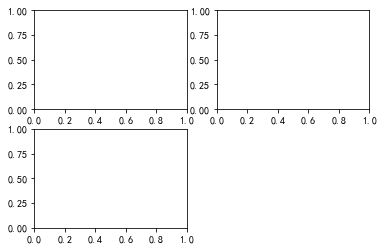

In [59]:
# matplotlib的图像都位于figure中，可以用plt.figure 创建一个图像
fig = plt.figure()
# 不能用空figure绘图，需要创建多个subplot
ax1=fig.add_subplot(2,2,1)  # 创建一共2*2个图像，当前是第1个
ax2=fig.add_subplot(2,2,2) 
ax3=fig.add_subplot(2,2,3) 

In [64]:
# 此时光标在第3个图像上
ax3.plot(np.random.randn(50).cumsum(),'k--')

In [65]:
ax1.hist(np.random.randn(50),bins=20,color='r',alpha=.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

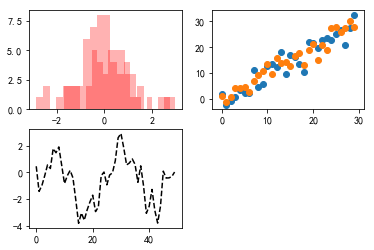

In [66]:
fig

#### 8.1.1.1调整Subplot周围的间距

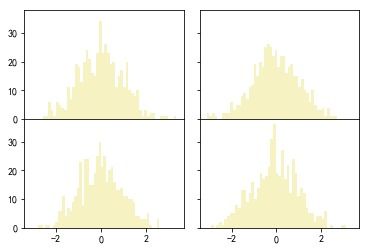

In [13]:
fig, axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='#EEE685',alpha=.5)
plt.subplots_adjust(wspace=0.1,hspace=0)

### 8.1.2 颜色、标记和线型

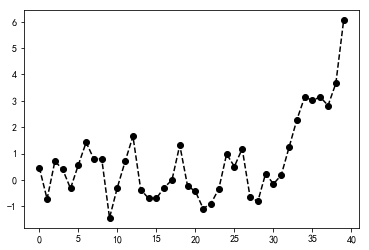

In [20]:
np.random.seed(1234)
plt.plot(np.random.randn(40).cumsum(),'ko--')

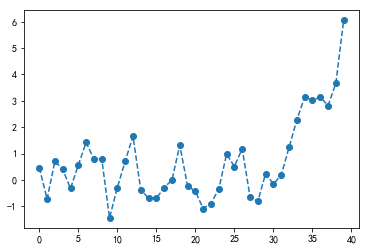

In [22]:
# 以上等同于以下更易读
np.random.seed(1234)
plt.plot(np.random.randn(40).cumsum(),linestyle='dashed',marker='o')

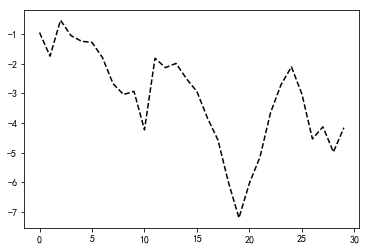

In [2]:
# 在线型图中使用非线性方式插值，drawstyle
df = np.random.randn(30).cumsum()
plt.plot(df,'k--',label='Default')

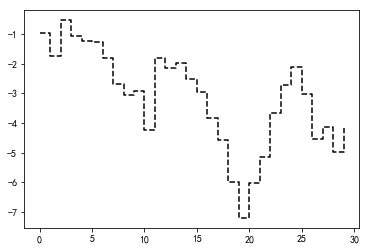

In [3]:
plt.plot(df,'k--',drawstyle='steps-post',label='steps-post')

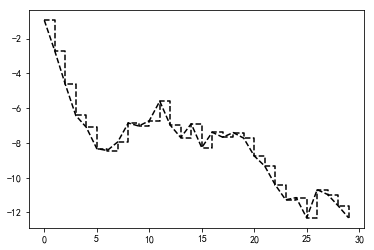

In [2]:
df = np.random.randn(30).cumsum()
plt.plot(df,'k--',label='Default')
plt.plot(df,'k--',drawstyle='steps-post',label='steps-post')

### 8.1.3 刻度、标签和图例

#### 8.1.3.1 设置标题、轴标签、刻度以及刻度标签

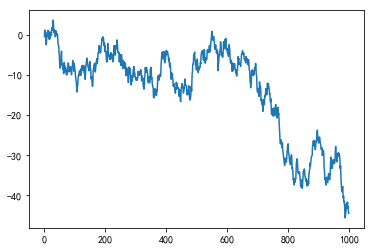

In [14]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [15]:
#  修改x轴刻度 set_xticks和set_xticklabels
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five']
                           ,rotation=30, fontsize='small')

In [16]:
ax.set_title('My first plot')

Text(0.5,1,'My first plot')

In [17]:
ax.set_label('Stages')

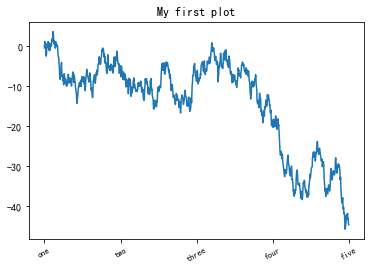

In [18]:
fig

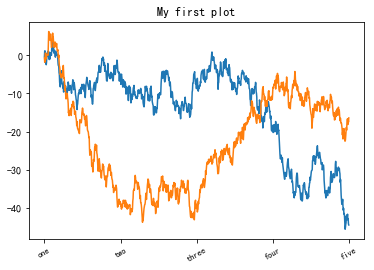

In [19]:
ax.plot(np.random.randn(1000).cumsum())
fig

#### 8.1.3.2 添加图例

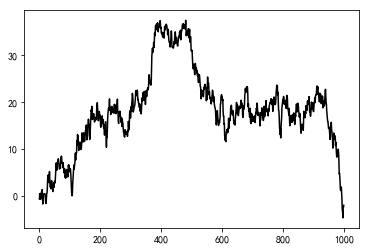

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

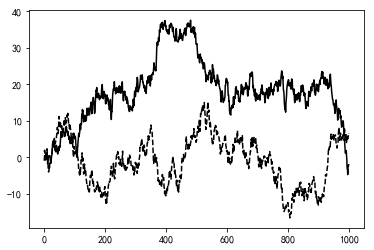

In [26]:
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
fig

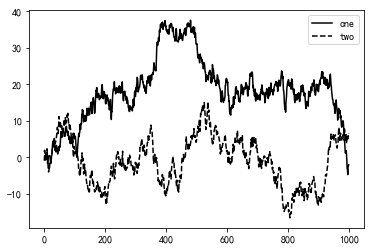

In [27]:
ax.legend(loc='best')
fig

### 8.1.4 注解以及在Subplot上绘图

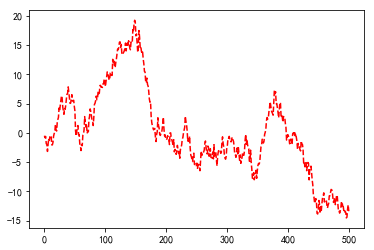

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.plot(np.random.randn(500).cumsum(),'r--') 

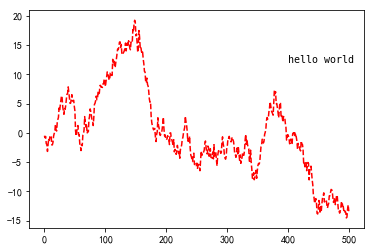

In [14]:
#  添加注解，指定坐标(x,y)
ax.text(400,12,'hello world',family='monospace', fontsize=10) 
fig

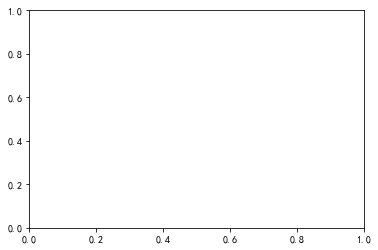

In [38]:
#### 复杂的注解案例
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 

df = pd.read_csv('pydata-book-2nd-edition/examples/spx.csv', 
                 index_col=0,parse_dates=True)
spx = df['SPX']

In [39]:
crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label, xy=(date,spx.asof(date)+50),
               xytext=(date,spx.asof(date)+200),
               arrowprops=dict(facecolor='black'),
               horizontalalignment='left',verticalalignment='top')

In [45]:
# 放大到2007-2010
ax.plot(df)
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

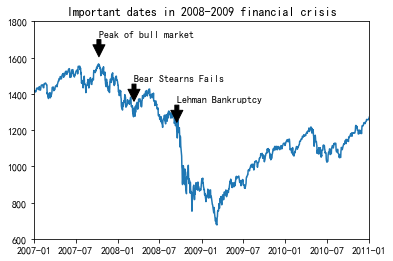

In [46]:
fig

### 8.1.5 将图表保存到文件

In [ ]:
plt.savefig('fig.png', dpi=400, bbox_inches='tight')

### 8.1.6 matplotlib配置

In [4]:
# 配置默认绘图参数
plt.rc()

## 8.2 pandas中的绘图函数

### 8.2.1 线型图

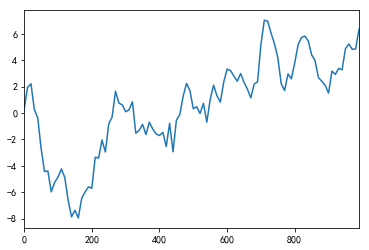

In [2]:
s = Series(np.random.randn(100).cumsum(), index=np.arange(0,1000,10))
s.plot()

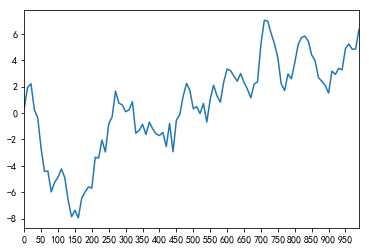

In [12]:
s.plot(xticks=np.arange(0,1000,50))

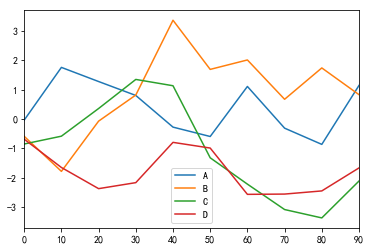

In [19]:
# dataframe对象，会自动为每一列绘制一条线，并创建图例
df = DataFrame(np.random.randn(10,4).cumsum(0),
               columns=['A','B','C','D'],
              index=np.arange(0,100,10))
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023437B9A9B0>,
      dtype=object)

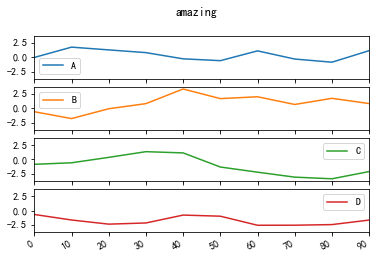

In [25]:
df.plot(subplots=True,sharex=True,sharey=True,title='amazing')

### 8.2.2 柱状图

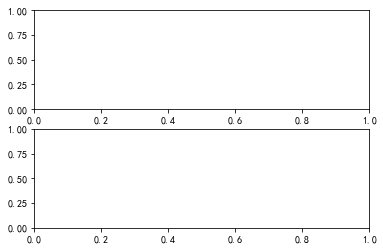

In [29]:
#  series
fig, axes = plt.subplots(2,1)
df = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [37]:
df.plot(kind='bar', ax=axes[0], color='k', alpha=.7)

df.plot(kind='barh', ax=axes[1], color='k', alpha=.7)

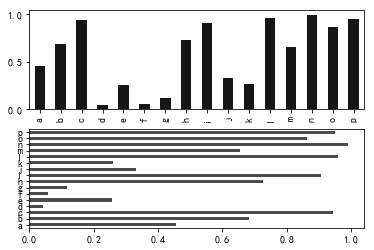

In [38]:
fig

In [42]:
#  dataframe 画柱状图，会把一行分为一组
df = DataFrame(np.random.rand(6,4),
              index=pd.Index(['one','two','three','four','five','six'],name='ttt'),
              columns=pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
ttt,,,,
one,0.890412,0.139413,0.717259,0.022633
two,0.883387,0.153921,0.192105,0.849580
three,0.988775,0.607516,0.818213,0.854677
four,0.428319,0.998508,0.882699,0.448080
five,0.245526,0.264313,0.333699,0.588895
six,0.689229,0.734109,0.564410,0.402080


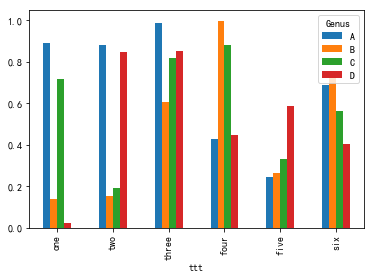

In [43]:
df.plot(kind='bar')

In [82]:
#  实战！！ 有关小费的数据集，分析日期和聚会规模的关系
tips = pd.read_csv('pydata-book-2nd-edition/examples/tips.csv')

party_counts =  pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [83]:
party_counts = party_counts.ix[:,2:5]
party_pcts = party_counts.div(party_counts.sum(1).astype(float),axis=0)
party_pcts

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


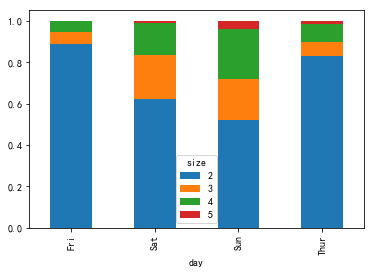

In [84]:
party_pcts.plot(kind='bar',stacked=True)

### 8.2.3 直方图和密度图

In [25]:
tips = pd.read_csv('pydata-book-2nd-edition/examples/tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']

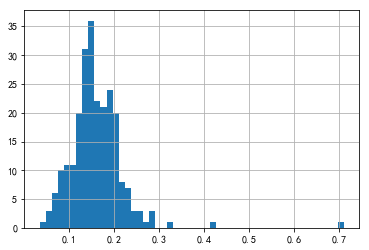

In [29]:
fig,axe = plt.subplots(1,1)
tips.tip_pct.hist(bins=50,grid=True)

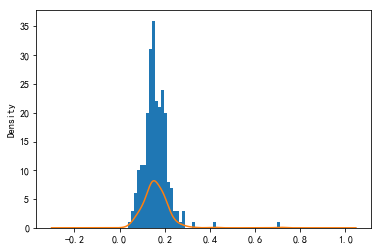

In [30]:
tips['tip_pct'].plot(kind='density', ax=axe)
fig

In [32]:
#  绘制2个不同的标准正态分布组成的双峰分布
comp1 = np.random.normal(0,1,size=200) # N(0,1)
comp2 = np.random.normal(10,2,size=200) # N(10,4)

tmp= Series(np.concatenate([comp1,comp2]))

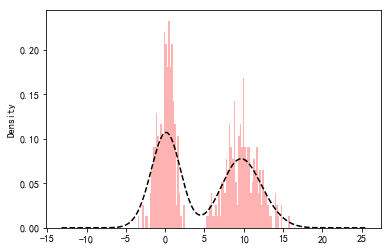

In [56]:
tmp.hist(bins=100, alpha=.3, color='r', normed=True)
tmp.plot(kind='kde', style='k--')

### 8.2.4 散布图

In [50]:
macro = pd.read_csv('pydata-book-2nd-edition/examples/macrodata.csv')
df = macro[['cpi','m1','tbilrate','unemp']]
df.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [51]:
trans_data = np.log(df).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


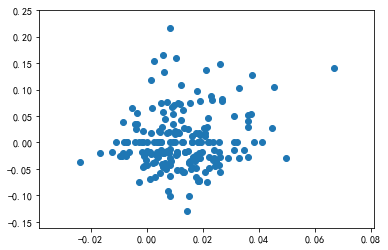

In [57]:
plt.scatter(trans_data['m1'], trans_data['unemp'])

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027AD7585EB8>,
      dtype=object)

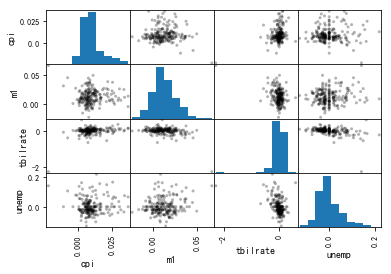

In [63]:
#  牛逼的pandas.scatter_matrix()，可以用来看特征间的相关性
pd.scatter_matrix(trans_data, diagonal='hist', color='k', alpha=.3)

## 8.3 绘制地图：图形化显示海地地震危机数据 

In [2]:
df = pd.read_csv('pydata-book-2nd-edition/examples/Haiti.csv')
df.dtypes

Serial              int64
INCIDENT TITLE     object
INCIDENT DATE      object
LOCATION           object
DESCRIPTION        object
CATEGORY           object
LATITUDE          float64
LONGITUDE         float64
APPROVED           object
VERIFIED           object
dtype: object

In [3]:
df.describe()
#  已知海地的gps位置，可以判断以下经纬度数据存在异常点

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [4]:
# 处理异常点
df = df[(df.LATITUDE>18)&(df.LATITUDE<20)&(df.LONGITUDE>-75)&(df.LONGITUDE<-70)&(df.CATEGORY.notnull())]

In [22]:

#  将各个分类信息拆分为编码
def get_all_categories(cat_series):
    #  获取所有分类的列表
    def to_cat_list(catstr):
        stripped = (x.strip() for x in catstr.split(','))
        return [x for x in stripped if x]
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

#  将各个分类信息拆分为英文
def get_english(cat):
    code,names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code,names.strip()

In [23]:
get_english('1. Urgences | Emergency')

('1', 'Emergency')

In [25]:
#  生成一个编码和名称映射的字典
all_cats = get_all_categories(df.CATEGORY)

#  生成器表达式
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [26]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

#  抽取唯一的分类编码
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(df),len(code_index))),
                       index=df.index,
                       columns=code_index)
dummy_frame.ix[:,:6]

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
for row,cat in zip(df.index,df.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row,codes] = 1

df = df.join(dummy_frame.add_prefix('category_'))
df.ix[:,10:15]

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0


In [28]:
df

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#### 开始绘图
from mpltoolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpltoolkits'

# CH9 数据聚合与分组运算

## 9.1 GroupBy技术

In [2]:
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})

In [9]:
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

### 9.1.1 对分组进行迭代

In [17]:
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})

In [3]:
for name,group in df.groupby('key1'):
    print(name,'\n',group)

a 
   key1 key2     data1     data2
0    a  one  0.080904 -1.214593
1    a  two -0.356494  0.430858
4    a  one -0.050179 -0.586984
b 
   key1 key2     data1     data2
2    b  one -0.957008  0.756797
3    b  two  0.038340  0.205687


In [4]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print(k1,k2,'\n',group)

a one 
   key1 key2     data1     data2
0    a  one  0.080904 -1.214593
4    a  one -0.050179 -0.586984
a two 
   key1 key2     data1     data2
1    a  two -0.356494  0.430858
b one 
   key1 key2     data1     data2
2    b  one -0.957008  0.756797
b two 
   key1 key2    data1     data2
3    b  two  0.03834  0.205687


In [15]:
tmp = dict(list(df.groupby('key1')))
tmp['b']

,key1,key2,data1,data2
2,b,one,-0.957008,0.756797
3,b,two,0.038340,0.205687


### 9.1.2 选取一个或一组列

In [21]:
# 两种方式相同，属于语法糖
print(df.groupby('key1')[['data1']].mean(),'\n\n'
     ,df.groupby('key1').mean()[['data1']])

         data1
key1          
a    -0.643709
b     0.340912 

          data1
key1          
a    -0.643709
b     0.340912


### 9.1.3 通过字典dict或Series进行分组

In [7]:
people = DataFrame(np.random.randn(5,5)
                  ,columns=list('abcde')
                  ,index=['Joe','Steve','Wes','Jim','Travis'])
people.ix[2:3,['b','c']] = np.nan
people

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,a,b,c,d,e
Joe,0.028006,-1.145978,0.741545,0.802225,-0.373232
Steve,0.721883,-0.103382,0.993356,-0.262284,0.329923
Wes,-0.331332,NaN,NaN,-0.762845,0.789237
Jim,-2.144076,-1.148221,0.959209,1.138212,0.292463
Travis,-0.253495,-1.053813,0.739977,-0.127145,0.798377


In [23]:
# 假设已知列的分组关系，并根据分组mappin计算列的总计
mapping = {'a':'red'
          ,'b':'red'
          ,'c':'blue'
          ,'d':'blue'
          ,'e':'red'
          ,'f':'orange'}
people.groupby(mapping,axis=1).sum()

,blue,red
Joe,0.949894,-0.891278
Steve,-0.012021,0.111073
Wes,0.988178,0.636105
Jim,0.724034,-1.561424
Travis,0.721020,-2.423786


In [26]:
people.groupby(Series(mapping),axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 9.1.4 通过函数进行分组

In [27]:
# 只要函数可以定义分组关系，那么任何被当作分组键的函数都被在各个索引值上被调用
# 仍旧以people为例
people.groupby(len).sum()

,a,b,c,d,e
3,-1.493421,-2.367145,1.727052,0.935054,2.043969
5,-1.212845,-0.518559,-0.342243,0.330222,1.842476
6,-2.045775,0.287479,-0.004937,0.725957,-0.665490


In [28]:
key_list = ['one','one','one','two','two']
people.groupby([len,key_list]).sum()

a         b         c         d         e
3 one  0.037161 -1.778771  0.404772  1.533300  1.486437
  two -1.530583 -0.588373  1.322281 -0.598247  0.557532
5 one -1.212845 -0.518559 -0.342243  0.330222  1.842476
6 two -2.045775  0.287479 -0.004937  0.725957 -0.665490

### 9.1.5 根据索引级别分组（层次化索引）

In [33]:
columns = pd.MultiIndex.from_arrays([['us','us','us','jp','jp'],[1,3,4,1,3]],names=['city','tenor'])

In [35]:
hier_df = DataFrame(np.random.randn(4,5),columns=columns)
hier_df

city         us                            jp          
tenor         1         3         4         1         3
0      0.266518 -1.657407  3.947035 -0.790037 -1.120142
1     -0.226641  1.700090  1.566905 -0.030243  0.820292
2     -0.218386 -0.074323 -1.029333 -0.539649  1.082081
3     -1.417569 -1.561112  0.894779  0.923379  0.399086

In [36]:
hier_df.groupby(level='city',axis=1).count()

city,jp,us
0,2,3
1,2,3
2,2,3
3,2,3


## 9.2 数据聚合

In [5]:
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})


In [8]:
# 通过agg方法使用自定义fun
# def peak_to_peak(arr):
#     return arr.max()-arr.min()
df.groupby('key1')[['data1']].agg(lambda arr:arr.max()-arr.min())

,data1
key1,
a,1.231159
b,0.893225


In [12]:
df.groupby('key1').describe().T

key1                a         b
data1 count  3.000000  2.000000
      mean  -0.414361  1.167090
      std    0.617782  0.631606
      min   -1.060029  0.720477
      25%   -0.707107  0.943784
      50%   -0.354185  1.167090
      75%   -0.091527  1.390396
      max    0.171130  1.613703
data2 count  3.000000  2.000000
      mean   0.562800  0.671228
      std    1.200698  1.172442
      min   -0.296862 -0.157813
      25%   -0.123128  0.256708
      50%    0.050606  0.671228
      75%    0.992632  1.085749
      max    1.934657  1.500270

In [2]:
# 更高级的函数功能演示在以下各节中演示，先预加载数据
tips = pd.read_csv('pydata-book-2nd-edition\\examples\\tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']

### 9.2.1 面向列的多函数应用

In [3]:
### 对不同的列使用不同的聚合函数 or 一次应用多个函数
grouped = tips.groupby(['size','smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

size  smoker
1     No        0.159829
      Yes       0.274755
2     No        0.164996
      Yes       0.166706
3     No        0.149671
      Yes       0.157543
4     No        0.147604
      Yes       0.142036
5     No        0.178415
      Yes       0.086116
6     No        0.156229
Name: tip_pct, dtype: float64

In [13]:
grouped_pct.agg(['mean','std'])

mean       std
size smoker                    
1    No      0.159829  0.030969
     Yes     0.274755  0.072094
2    No      0.164996  0.042400
     Yes     0.166706  0.090514
3    No      0.149671  0.037872
     Yes     0.157543  0.060374
4    No      0.147604  0.027901
     Yes     0.142036  0.067085
5    No      0.178415  0.060378
     Yes     0.086116  0.028929
6    No      0.156229  0.042153

In [17]:
# 给聚合函数命名
grouped_pct.agg([('foo','mean'),('bar',np.std)])

foo       bar
size smoker                    
1    No      0.159829  0.030969
     Yes     0.274755  0.072094
2    No      0.164996  0.042400
     Yes     0.166706  0.090514
3    No      0.149671  0.037872
     Yes     0.157543  0.060374
4    No      0.147604  0.027901
     Yes     0.142036  0.067085
5    No      0.178415  0.060378
     Yes     0.086116  0.028929
6    No      0.156229  0.042153

In [12]:
# 多个函数应用在至少1列时，出现了层次化的列
grouped_pct.agg({'tip':['mean','std'],'tip_pct':'std'})

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


tip             tip_pct
                 mean       std   tip_pct
size smoker                              
1    No      0.159829  0.030969  0.030969
     Yes     0.274755  0.072094  0.072094
2    No      0.164996  0.042400  0.042400
     Yes     0.166706  0.090514  0.090514
3    No      0.149671  0.037872  0.037872
     Yes     0.157543  0.060374  0.060374
4    No      0.147604  0.027901  0.027901
     Yes     0.142036  0.067085  0.067085
5    No      0.178415  0.060378  0.060378
     Yes     0.086116  0.028929  0.028929
6    No      0.156229  0.042153  0.042153

In [19]:
# 还可以预先定义一组函数
tmp = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(tmp)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
size smoker                                                         
1    No           2  0.159829  0.181728          2   8.660000  10.07
     Yes          2  0.274755  0.325733          2   5.825000   8.58
2    No          90  0.164996  0.291990         90  15.342333  26.41
     Yes         66  0.166706  0.710345         66  17.955758  40.55
3    No          26  0.149671  0.227747         26  21.009615  38.07
     Yes         12  0.157543  0.230742         12  28.191667  50.81
4    No          26  0.147604  0.192288         26  27.769231  48.33
     Yes         11  0.142036  0.280535         11  30.609091  43.11
5    No           3  0.178415  0.241663          3  30.576667  41.19
     Yes          2  0.086116  0.106572          2  29.305000  30.46
6    No           4  0.156229  0.195335          4  34.830000  48.17

### 9.2.2 以“无索引”的形式返回聚合数据

In [16]:
tips.groupby(['size','smoker'],as_index=False).mean()

,size,smoker,total_bill,tip,tip_pct
0,1,No,8.660000,1.415000,0.159829
1,1,Yes,5.825000,1.460000,0.274755
2,2,No,15.342333,2.489000,0.164996
3,2,Yes,17.955758,2.709545,0.166706
4,3,No,21.009615,3.069231,0.149671
5,3,Yes,28.191667,4.095000,0.157543
6,4,No,27.769231,4.195769,0.147604
7,4,Yes,30.609091,3.992727,0.142036
8,5,No,30.576667,5.046667,0.178415
9,5,Yes,29.305000,2.500000,0.086116


## 9.3 分组级运算和转换

In [2]:
# 为df添加一个存放各索引分组平均值的列
# 尝试先分组、再合并
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})

In [3]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,0.816659,-0.155286
b,0.335670,0.588226


In [4]:
pd.merge(df,k1_means,left_on='key1',right_on='key1')

,key1,key2,data1,data2,mean_data1,mean_data2
0,a,one,-0.655805,0.359951,0.816659,-0.155286
1,a,two,-0.102484,0.443582,0.816659,-0.155286
2,a,one,3.208265,-1.269389,0.816659,-0.155286
3,b,one,-0.279580,-0.650000,0.335670,0.588226
4,b,two,0.950919,1.826453,0.335670,0.588226


In [5]:
pd.merge(df,k1_means,left_on='key1',right_index=True)
# 达成了目的， 但是不灵活。。

,key1,key2,data1,data2,mean_data1,mean_data2
0,a,one,-0.655805,0.359951,0.816659,-0.155286
1,a,two,-0.102484,0.443582,0.816659,-0.155286
4,a,one,3.208265,-1.269389,0.816659,-0.155286
2,b,one,-0.279580,-0.650000,0.335670,0.588226
3,b,two,0.950919,1.826453,0.335670,0.588226


In [11]:
### 尝试使用transform方法处理前面的people数据集
key = ['one','two','one','two','one']
people.groupby(key).mean()

,a,b,c,d,e
one,-0.185607,-1.099896,0.740761,-0.029255,0.404794
two,-0.711097,-0.625801,0.976282,0.437964,0.311193


In [12]:
people.groupby(key).transform(np.mean)
# transform会将函数应用到各组，同时保留各组形式

,a,b,c,d,e
Joe,-0.185607,-1.099896,0.740761,-0.029255,0.404794
Steve,-0.711097,-0.625801,0.976282,0.437964,0.311193
Wes,-0.185607,-1.099896,0.740761,-0.029255,0.404794
Jim,-0.711097,-0.625801,0.976282,0.437964,0.311193
Travis,-0.185607,-1.099896,0.740761,-0.029255,0.404794


In [27]:
def demean(arr):
    return arr-arr.mean()
demean_df = people.groupby(key).transform(demean)
demean_df

,a,b,c,d,e
Joe,0.213613,-0.046082,0.000784,0.831480,-0.778026
Steve,1.432979,0.522419,0.017073,-0.700248,0.018730
Wes,-0.145725,NaN,NaN,-0.733590,0.384443
Jim,-1.432979,-0.522419,-0.017073,0.700248,-0.018730
Travis,-0.067888,0.046082,-0.000784,-0.097890,0.393584


In [28]:
demean_df.groupby(key).mean()

,a,b,c,d,e
one,-3.700743e-17,1.110223e-16,5.551115e-17,-2.312965e-17,0.000000e+00
two,0.000000e+00,0.000000e+00,5.551115e-17,0.000000e+00,-2.775558e-17


### 9.3.1 apply:一般性的“拆分-应用-合并”

In [2]:
tips = pd.read_csv('pydata-book-2nd-edition\\examples\\tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']

In [27]:
# 选出指定列tip_pct最高的5个值
def top(df,n=5,columns='tip_pct'):
    return df.sort_index(by=columns)[-n:]

In [28]:
top(tips)

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [39]:
# 尝试分组后再使用top函数
tips.groupby('smoker').apply(top)

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [99]:
tips.groupby('smoker')['size'].describe().stack()

smoker       
No      count    151.000000
        mean       2.668874
        std        1.017984
        min        1.000000
        25%        2.000000
        50%        2.000000
        75%        3.000000
        max        6.000000
Yes     count     93.000000
        mean       2.408602
        std        0.810751
        min        1.000000
        25%        2.000000
        50%        2.000000
        75%        3.000000
        max        5.000000
dtype: float64

#### 9.3.1.1 禁止分组键

In [2]:
tips = pd.read_csv('pydata-book-2nd-edition\\examples\\tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']

In [10]:
def top(df,n=5,columns='tip_pct'):
    return df.sort_index(by=columns)[-n:]
tips.groupby('smoker').apply(top)

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [11]:
# group_keys=False可以!禁止!分组键（‘smoker’）跟原始对象的索引共同
# 构成结果对象中的层次化索引
tips.groupby('smoker',group_keys=False).apply(top)

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [9]:
tips.groupby('smoker').describe().stack()

size         tip     tip_pct  total_bill
smoker                                                      
No     count  151.000000  151.000000  151.000000  151.000000
       mean     2.668874    2.991854    0.159328   19.188278
       std      1.017984    1.377190    0.039910    8.255582
       min      1.000000    1.000000    0.056797    7.250000
       25%      2.000000    2.000000    0.136906   13.325000
       50%      2.000000    2.740000    0.155625   17.590000
       75%      3.000000    3.505000    0.185014   22.755000
       max      6.000000    9.000000    0.291990   48.330000
Yes    count   93.000000   93.000000   93.000000   93.000000
       mean     2.408602    3.008710    0.163196   20.756344
       std      0.810751    1.401468    0.085119    9.832154
       min      1.000000    1.000000    0.035638    3.070000
       25%      2.000000    2.000000    0.106771   13.420000
       50%      2.000000    3.000000    0.153846   17.920000
       75%      3.000000    3.680000    0.195059   26.860000
       max      5.000000   10.000000    0.710345   50.810000

### 9.3.2 分位数和桶（分位数）分析

In [13]:
frame = DataFrame({'data1':np.random.randn(1000),
                  'data2':np.random.randn(1000)})
factor = pd.cut(frame.data1,4)
factor[:10]

0     (-0.122, 1.391]
1      (1.391, 2.904]
2      (1.391, 2.904]
3    (-1.635, -0.122]
4     (-0.122, 1.391]
5      (1.391, 2.904]
6     (-0.122, 1.391]
7    (-3.154, -1.635]
8     (-0.122, 1.391]
9    (-1.635, -0.122]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.154, -1.635] < (-1.635, -0.122] < (-0.122, 1.391] < (1.391, 2.904]]

In [14]:
## 返回的cut对象可以直接用户groupby
def get_stats(group):
    return {'min':group.min(),
           'max':group.max(),
           'count':group.count(),
           'mean':group.mean()}

In [24]:
grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.154, -1.635]",46.0,2.326342,0.080671,-1.945519
"(-1.635, -0.122]",376.0,2.668752,0.044823,-3.355904
"(-0.122, 1.391]",488.0,3.529620,-0.023838,-3.163762
"(1.391, 2.904]",90.0,1.768455,-0.102438,-2.789584


In [26]:
## 返回分位数编号
grouping = pd.cut(frame.data1,10,labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,1.0,0.549221,0.549221,0.549221
1,17.0,1.524567,-0.070199,-1.945519
2,57.0,2.326342,0.121858,-1.509096
3,135.0,2.328104,-0.039581,-2.719162
4,212.0,2.668752,0.092482,-3.355904
5,229.0,2.634798,-0.002286,-3.163762
6,206.0,3.529620,-0.037438,-2.723190
7,87.0,2.253046,-0.188270,-2.789584
8,48.0,1.768455,0.137490,-1.836301


### 9.3.3 示例：用特定于分组的值填充缺失值

In [28]:
s = Series(np.random.randn(6))
s

0    1.662255
1   -1.259417
2    0.953718
3    0.910574
4    1.375329
5   -0.219827
dtype: float64

In [29]:
s[::2] = np.nan
s

0         NaN
1   -1.259417
2         NaN
3    0.910574
4         NaN
5   -0.219827
dtype: float64

In [12]:
s.fillna(s.mean())

0   -0.755244
1   -1.418821
2   -0.755244
3   -0.498515
4   -0.755244
5   -0.348397
dtype: float64

In [13]:
## 如果需要对不同的分组填充不同的值，只需将数据分组
states = ['Ohio','New York','Vermont','Florida','Oregon','Nevada','California','Idaho']
group_key = ['East']*4+['West']*4
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [19]:
df = Series(np.random.randn(8),index=states)
df[['Vermont','Nevada','Idaho']] = np.nan
df

Ohio          0.351716
New York      1.219196
Vermont            NaN
Florida      -1.000675
Oregon        0.321345
Nevada             NaN
California    1.548904
Idaho              NaN
dtype: float64

In [20]:
df.groupby(group_key).mean()

East    0.190079
West    0.935125
dtype: float64

In [24]:
# 于是可以用分组的均值填充na
fill_mean = lambda x:x.fillna(x.mean())
df.groupby(group_key).apply(fill_mean)

Ohio          0.351716
New York      1.219196
Vermont       0.190079
Florida      -1.000675
Oregon        0.321345
Nevada        0.935125
California    1.548904
Idaho         0.935125
dtype: float64

In [36]:
# 也可以自定义填充值
fill_values = {'East':.5,
              'West':-1}
fill_func = lambda x:x.fillna(fill_values[x.name])

In [37]:
df.groupby(group_key).apply(fill_func)

Ohio          0.351716
New York      1.219196
Vermont       0.500000
Florida      -1.000675
Oregon        0.321345
Nevada       -1.000000
California    1.548904
Idaho        -1.000000
dtype: float64

In [51]:
df.groupby(group_key).apply(lambda x:x.fillna(fill_values[x.name]))

Ohio          0.351716
New York      1.219196
Vermont       0.500000
Florida      -1.000675
Oregon        0.321345
Nevada       -1.000000
California    1.548904
Idaho        -1.000000
dtype: float64

### 9.3.4 示例：随机采样和排列

In [34]:
## 构造一副英语型扑克牌
suits = ['H','S','C','D']
card_val = (list(range(1,11)) + [10]*3)*4
base_names = ['A'] + list(range(2,11)) + ['J','K','Q']
cards = []

In [35]:
for suit in ['H','S','C','D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val,index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [38]:
# 从整副牌中抽出5张
def draw(deck,n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

draw(deck)

8H     8
JH    10
6H     6
4D     4
7C     7
dtype: int64

In [40]:
# 从每种花色中随机抽取2张牌
get_suit = lambda card:card[-1] #保留字母
get_suit

<function __main__.<lambda>(card)>

In [41]:
deck.groupby(get_suit).apply(draw,n=2)

C  KC    10
   5C     5
D  KD    10
   2D     2
H  QH    10
   2H     2
S  3S     3
   JS    10
dtype: int64

In [14]:
str = '5CBA'
str[1:-1]

'CB'

### 9.3.5 示例：分组加权平均数和相关系数

In [2]:
df = DataFrame({'category':list('aaaabbbb')
               ,'data':np.random.randn(8)
               ,'weights':np.random.randn(8)})
df

,category,data,weights
0,a,-0.549821,0.674282
1,a,1.489366,0.189401
2,a,0.683807,1.382386
3,a,0.644039,-0.003316
4,b,1.849122,0.262706
5,b,2.092511,-0.520032
6,b,0.034119,0.330782
7,b,-0.873072,-0.928331


In [17]:
grouped = df.groupby('category')
get_wavg = lambda g:np.average(g['data'],weights=g['weights'])
grouped.apply(get_wavg)

category
a   -0.229959
b    2.603053
dtype: float64

### 9.3.6 示例：面向分组的线性回归

## 9.4 透视表和交叉表

In [13]:
tips = pd.read_csv('F:\\Python3.6\\Jupyter\\pydata-book-2nd-edition\\examples\\tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips.describe()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [14]:
tips.pivot_table(index=['sex','smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [15]:
# groupby是简易的pivot_table
tips.groupby(by=['sex','smoker']).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [19]:
tips.pivot_table(index=['sex','day'],columns='smoker',values=['size','tip_pct'],margins=True,margins_name='all_mean')

size                       tip_pct                    
smoker               No       Yes  all_mean        No       Yes  all_mean
sex      day                                                             
Female   Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
         Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
         Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
         Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male     Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
         Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
         Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
         Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
all_mean       2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [20]:
# 使用其他的聚合函数aggfunc
tips.pivot_table(values='size',index=['time','sex','smoker'],columns='day',aggfunc=sum,fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

### 9.4.1 交叉表：crosstab

In [2]:
# 用于计算分组频率的特殊透视表
tips = pd.read_csv('F:\\Python3.6\\Jupyter\\pydata-book-2nd-edition\\examples\\tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [3]:
pd.crosstab(index=[tips.time,tips.day]
            ,columns=tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## 9.5 示例：2012联邦选举委员会数据库

In [4]:
fec = pd.read_csv('pydata-book-2nd-edition\\datasets\\fec\\P00000001-ALL.csv')

E:\Anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [6]:
fec.iloc[8]

cmte_id                        C00410118
cand_id                        P20002978
cand_nm               Bachmann, Michelle
contbr_nm                 COLLINS, SARAH
contbr_city                         MESA
contbr_st                             AZ
contbr_zip                   8.52107e+08
contbr_employer      ST. JOSEPH HOSPITAL
contbr_occupation                     RN
contb_receipt_amt                    250
contb_receipt_dt               21-JUN-11
receipt_desc                         NaN
memo_cd                              NaN
memo_text                            NaN
form_tp                            SA17A
file_num                          736166
Name: 8, dtype: object

In [10]:
list(fec.cand_nm.unique())

['Bachmann, Michelle',
 'Romney, Mitt',
 'Obama, Barack',
 "Roemer, Charles E. 'Buddy' III",
 'Pawlenty, Timothy',
 'Johnson, Gary Earl',
 'Paul, Ron',
 'Santorum, Rick',
 'Cain, Herman',
 'Gingrich, Newt',
 'McCotter, Thaddeus G',
 'Huntsman, Jon',
 'Perry, Rick']

In [5]:
# 用“map方法”映射填补候选人对应的党派
parties = {'Bachmann, Michelle':'Republican',
           'Romney, Mitt':'Republican',
           'Obama, Barack':'Democrat',
           "Roemer, Charles E. 'Buddy' III":'Republican',
           'Pawlenty, Timothy':'Republican',
           'Johnson, Gary Earl':'Republican',
           'Paul, Ron':'Republican',
           'Santorum, Rick':'Republican',
           'Cain, Herman':'Republican',
           'Gingrich, Newt':'Republican',
           'McCotter, Thaddeus G':'Republican',
           'Huntsman, Jon':'Republican',
           'Perry, Rick':'Republican'}
fec['party'] = fec.cand_nm.map(parties)
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [6]:
print((fec.contb_receipt_amt>0).value_counts())
# 去除退款项
fec = fec[fec.contb_receipt_amt>0]

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64


In [7]:
# 筛选热门候选人Obama 和 Romney的子集
fec_mrbo = fec[fec.cand_nm.isin(['Romney, Mitt','Obama, Barack'])]

### 9.5.1 根据职业和雇主统计赞助信息

In [37]:
# 首先同样使用map清理职业信息
fec.contbr_occupation.value_counts()

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
SOFTWARE ENGINEER   

In [8]:
occ_mapping = {'INFORMATION REQUESTED':'NOT PROVIDED',
               'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
               'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
              'C.E.O':'CEO'}
# 如果没有提供映射，返回原值
f = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [9]:
# 再map雇主信息
emp_mapping = {'INFORMATION REQUESTED':'NOT PROVIDED',
               'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
              'SELF':'SELF-EMPLOYED',
              'SELF EMPLOYED':'SELF-EMPLOYED'}
f = lambda x:emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [10]:
by_occupation = fec.pivot_table(values='contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',
                               aggfunc=np.sum 
                               )
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm.sort_values(by='Democrat',ascending=False,inplace=True)
over_2mm

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


party,Democrat,Republican
contbr_occupation,,
RETIRED,25305116.38,2.356124e+07
ATTORNEY,11141982.97,7.477194e+06
NOT PROVIDED,4866973.96,2.056547e+07
HOMEMAKER,4248875.80,1.363428e+07
PHYSICIAN,3735124.94,3.594320e+06
LAWYER,3160478.87,3.912243e+05
CONSULTANT,2459912.71,2.544725e+06
PROFESSOR,2165071.08,2.967027e+05
CEO,2074284.79,1.640758e+06


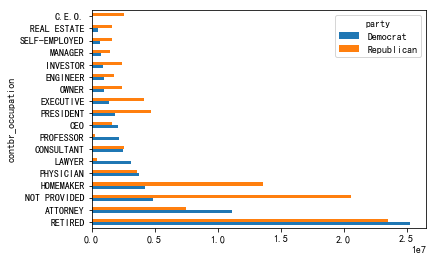

In [11]:
over_2mm.plot(kind='barh')

In [12]:
# 对Obama和Romney出资最高的职业和企业
def get_top_amounts(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    # 根据key对totals降序
    return totals.sort_values(ascending=False)[:5]
    # return totals.nlargest(n)

# 根据职业和雇主聚合
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
Name: contb_receipt_amt, dtype: float64

In [64]:
grouped.apply(get_top_amounts,'contbr_employer',n=7)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7409860.98
               STUDENT                                     496490.94
Name: contb_receipt_amt, dtype: float64

### 9.5.2 对出资额分组

In [13]:
# 利用cut()根据出资额的大小将数据离散化到多个面元中
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [18]:
# 根据候选人姓名以及面元标签对数据分组
grouped = fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [32]:
# 对出资额求和并在面元内规格化，以便图形化
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [33]:
# 归一化
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


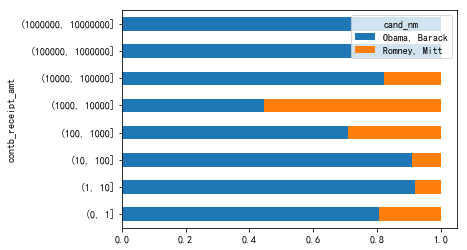

In [39]:
normed_sums.plot(kind='barh',stacked=True)

### 9.5.3 根据州统计赞助信息

In [45]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1)>100000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [46]:
percent = totals.div(totals.sum(1),axis=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


# CH10 时间序列

## 10.1 日期和时间数据类型及工具

In [19]:
# 最常用的时间相关模块：datetime\time\calender
from datetime import datetime
now = datetime.now()
now
now.day

23

In [14]:
delta = datetime(2018,11,17) - datetime(2018,11,20,17,20,59)
delta

datetime.timedelta(-4, 23941)

In [21]:
from datetime import timedelta
start = datetime(2018,11,17)
start + timedelta(-3)

datetime.datetime(2018, 11, 14, 0, 0)

### 10.1.1 字符串和datetime的相互转换

In [24]:
stamp = datetime(2011,1,3)
print(stamp,'\t',str(stamp))

2011-01-03 00:00:00 	 2011-01-03 00:00:00


In [35]:
# 时间 to 字符串
tmp = stamp.strftime('%Y-%m-%d')
type(tmp)

str

In [34]:
# 字符串 to 时间
value = '18-11-10'
datetime.strptime(value, '%y-%m-%d')

datetime.datetime(2018, 11, 10, 0, 0)

## 10.2 时间序列基础

In [19]:
from datetime import datetime
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7)
         ,datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]
ts = Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.103156
2011-01-05   -0.228139
2011-01-07    0.182267
2011-01-08    0.988507
2011-01-10    0.744568
2011-01-12    0.745794
dtype: float64

In [20]:
ts[::2]+ts

2011-01-02   -0.206311
2011-01-05         NaN
2011-01-07    0.364534
2011-01-08         NaN
2011-01-10    1.489136
2011-01-12         NaN
dtype: float64

### 10.2.1 索引、选取、子集构造

In [21]:
ts['2011-01-07']

0.182267196124257

In [22]:
ts['20110107']

0.182267196124257

In [25]:
longer_ts = Series(np.random.randn(1000),index=pd.date_range(start='1/1/2000',periods=1000))
longer_ts['2002'].head()

2002-01-01    1.314348
2002-01-02    0.513027
2002-01-03    0.852709
2002-01-04   -1.638826
2002-01-05   -0.587863
Freq: D, dtype: float64

In [27]:
longer_ts['2001-1-15':'2001-1-22']

2001-01-15   -0.749646
2001-01-16    0.178177
2001-01-17    0.160974
2001-01-18    1.095093
2001-01-19   -1.200104
2001-01-20    0.160212
2001-01-21   -0.358449
2001-01-22   -0.624420
Freq: D, dtype: float64

In [28]:
# 另一个截取两个日期之间的函数
longer_ts.truncate(before='2001-1-15',after='2001-1-22')

2001-01-15   -0.749646
2001-01-16    0.178177
2001-01-17    0.160974
2001-01-18    1.095093
2001-01-19   -1.200104
2001-01-20    0.160212
2001-01-21   -0.358449
2001-01-22   -0.624420
Freq: D, dtype: float64

In [30]:
# 索引为datetime的Dataframe
dates = pd.date_range('2000-1-1',periods=100,freq='W-WED')
long_df = DataFrame(np.random.randn(100,4)
                    ,index=dates
                    ,columns=['Colorado','Texas','New York','Ohio'])
long_df.head(6)

,Colorado,Texas,New York,Ohio
2000-01-05,0.374809,1.060656,0.591781,0.376340
2000-01-12,2.365462,-2.755820,0.915073,0.412724
2000-01-19,0.805268,2.361014,-1.326597,0.986388
2000-01-26,0.610871,-0.038923,0.123751,0.112573
2000-02-02,-1.357744,0.586696,-0.456312,-0.589330
2000-02-09,0.168403,0.886143,-1.377750,0.908286


### 10.2.2 带有重复索引的时间序列

In [10]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts = Series(np.arange(4),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-03    3
dtype: int32

In [15]:
dup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    2
2000-01-03    1
dtype: int64

## 10.3 日期的范围、频率以及移动

In [16]:
from datetime import datetime
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7)
         ,datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]
ts = Series(np.random.randn(6),index=dates)
ts

2011-01-02    1.915275
2011-01-05    1.328345
2011-01-07    0.317190
2011-01-08    1.706063
2011-01-10   -0.287242
2011-01-12    0.067244
dtype: float64

In [21]:
# 重采样，填补缺失的日期
ts.resample(rule='D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### 10.3.1 生成日期范围

In [27]:
pd.date_range(start='1/1/2000',end='4/1/2000',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='BM')

In [29]:
# 时间统一到0点0分
pd.date_range('1/2/2000 12:56:44',periods=6,normalize=True)

DatetimeIndex(['2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

### 10.3.2 频率和日期偏移量

In [9]:
DataFrame(data=np.arange(16),index=pd.date_range('1/1/2000','1/1/2000 23:44',freq='1h30min'))

,0
2000-01-01 00:00:00,0
2000-01-01 01:30:00,1
2000-01-01 03:00:00,2
2000-01-01 04:30:00,3
2000-01-01 06:00:00,4
2000-01-01 07:30:00,5
2000-01-01 09:00:00,6
2000-01-01 10:30:00,7
2000-01-01 12:00:00,8
2000-01-01 13:30:00,9


In [6]:
from pandas.tseries.offsets import Hour,Minute
Hour(1)+Minute(1)

<61 * Minutes>

### 10.3.3 移动（超强和滞后）数据

In [2]:
ts = Series(np.random.randn(4)
            ,index=pd.date_range('1/1/2000',periods=4,freq='M'))
print(ts,'\n\n',ts.shift(2)) 
# shift 可用于计算一个或多个时间序列中百分比的变化，ARMA(m,n)

2000-01-31    0.005009
2000-02-29   -0.401122
2000-03-31    0.777749
2000-04-30   -0.500977
Freq: M, dtype: float64 

 2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.005009
2000-04-30   -0.401122
Freq: M, dtype: float64


In [4]:
# 为了避免丢数据，可以移位时间戳index
ts.shift(2,freq='M')

2000-03-31    0.005009
2000-04-30   -0.401122
2000-05-31    0.777749
2000-06-30   -0.500977
Freq: M, dtype: float64

In [5]:
ts.shift(2,freq='D')

2000-02-02    0.005009
2000-03-02   -0.401122
2000-04-02    0.777749
2000-05-02   -0.500977
dtype: float64

#### 10.3.3.1 通过偏移量对日期进行位移

In [4]:
from pandas.tseries.offsets import Day,MonthEnd
now = datetime(2011,11,17)
now + 2*Day(3)

Timestamp('2011-11-23 00:00:00')

In [5]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [12]:
MonthEnd(2).rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [16]:
# 结合groupby的骚操作
ts = Series(np.random.randn(20),
           index=pd.date_range('2000-1-15',periods=20,freq='4d'))
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.529960
2000-02-29   -0.680711
2000-03-31   -0.178870
dtype: float64

## 10.4 时区处理

时区信息来自第三方库pytz，包含于pandas中

In [20]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

### 10.4.1 本地化和转换

In [2]:
# 标准时区UTC
rng = pd.date_range('2012-3-9 9:30',periods=6,freq='D',tz='UTC')
ts = Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00+00:00    1.544425
2012-03-10 09:30:00+00:00   -0.563593
2012-03-11 09:30:00+00:00   -1.473324
2012-03-12 09:30:00+00:00    0.923521
2012-03-13 09:30:00+00:00    0.331798
2012-03-14 09:30:00+00:00   -0.578518
Freq: D, dtype: float64

In [6]:
# 转换到US/Eastern时区
ts.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    1.544425
2012-03-10 04:30:00-05:00   -0.563593
2012-03-11 05:30:00-04:00   -1.473324
2012-03-12 05:30:00-04:00    0.923521
2012-03-13 05:30:00-04:00    0.331798
2012-03-14 05:30:00-04:00   -0.578518
Freq: D, dtype: float64

### 10.4.2 操作时区意识型Timestamp对象

In [12]:
stamp = pd.Timestamp('2011-3-12 4:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [15]:
stamp_moscow = pd.Timestamp('2011-3-12 4:00',tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [16]:
stamp_moscow.tz_convert('utc')

Timestamp('2011-03-12 01:00:00+0000', tz='UTC')

### 10.4.3 不同时区之间的运算

In [2]:
# 两个不同时区的序列相加，结果会是utc
rng = pd.date_range('2012-3-7 9:30',periods=10,freq='B')
ts = Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-07 09:30:00   -1.491785
2012-03-08 09:30:00    0.449769
2012-03-09 09:30:00    0.213534
2012-03-12 09:30:00    0.711792
2012-03-13 09:30:00   -0.394920
2012-03-14 09:30:00    2.156835
2012-03-15 09:30:00   -1.220417
2012-03-16 09:30:00   -2.610255
2012-03-19 09:30:00    1.141652
2012-03-20 09:30:00    0.766897
Freq: B, dtype: float64

In [3]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [23]:
ts1+ts2

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    1.719548
2012-03-12 09:30:00+00:00    0.500600
2012-03-13 09:30:00+00:00   -2.219054
2012-03-14 09:30:00+00:00   -0.399848
2012-03-15 09:30:00+00:00   -1.151290
Freq: B, dtype: float64

## 10.5 时间及其算术运算

In [7]:
# period时期，表示的是时间区间，比如年月日季等
p = pd.Period(2007,freq='A-DEC')
p

Period('2007', 'A-DEC')

In [8]:
p-2

Period('2005', 'A-DEC')

In [30]:
# 创建时期index的方法一：同步创建（自由度较低）
# period_range 创建时期范围
rng = pd.period_range('2000/1/1','2000/6/30',freq='M')
rng
Series(np.random.rand(6),index=rng)

2000-01    0.745701
2000-02    0.271055
2000-03    0.873621
2000-04    0.628185
2000-05    0.508813
2000-06    0.052684
Freq: M, dtype: float64

In [13]:
# 另一种创建时期index的方法：函数创建（较灵活）
index = pd.PeriodIndex(['2001Q3','2002Q2','2003Q1'],freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [14]:
Series(np.arange(3),index=index)

2001Q3    0
2002Q2    1
2003Q1    2
Freq: Q-DEC, dtype: int32

### 10.5.1 时期的频率转换

In [10]:
p = pd.Period('2001',freq='A-JUN')
p

Period('2001', 'A-JUN')

In [11]:
p.asfreq('M',how='start')

Period('2000-07', 'M')

In [13]:
p.asfreq('B','end')

Period('2001-06-29', 'B')

### 10.5.2 按季度计算的时期频率

In [7]:
# 以1月结束的2012Q4财年
p = pd.Period('2012Q4',freq='Q-Jan')
print(p.asfreq('D','s'),'\t',p.asfreq('D','e'))

2011-11-01 	 2012-01-31


In [8]:
p.asfreq('D','s')-p.asfreq('D','e')

-91

In [11]:
(p.asfreq('D','e')-1).asfreq('T','s')+2*60

Period('2012-01-30 02:00', 'T')

### 10.5.3 将Timestamp转换为Period（及其方向过程）

In [14]:
# o_period方法，将以timestamp为index的数据转换为以period索引
rng = pd.date_range('2000/1/1',periods=3,freq='M')
ts = Series(np.random.randn(3),index=rng)
pts = ts.to_period()
pts

2000-01    0.879498
2000-02   -0.374426
2000-03    1.663904
Freq: M, dtype: float64

In [16]:
pts.to_timestamp(freq='D',how='s')

2000-01-01    0.879498
2000-02-01   -0.374426
2000-03-01    1.663904
Freq: MS, dtype: float64

### 10.5.4 通过数组创建PeriodIndex

In [17]:
df = pd.read_csv('pydata-book-2nd-edition\\ch08\\macrodata.csv')
df.describe()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


In [31]:
index = pd.PeriodIndex(year=df.year,quarter=df.quarter,freq='Q-DEC')
df.index = index
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## 10.6 重采样及频率转换

In [37]:
# pd.resample
rng = pd.date_range('2000/1/1',periods=100,freq='D')
ts = Series(np.random.randn(100),index=rng)
ts.head()

2000-01-01   -0.563574
2000-01-02   -0.286752
2000-01-03   -0.483727
2000-01-04    1.421916
2000-01-05   -1.208782
Freq: D, dtype: float64

In [39]:
ts.resample('M',how='mean',kind='period')

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01   -0.229898
2000-02   -0.184134
2000-03    0.204547
2000-04   -0.141589
Freq: M, dtype: float64

### 10.6.1 降采样downsampling

In [54]:
# “1分钟”数据降采样示例
rng = pd.date_range('2000/1/1',periods=12,freq='t')
ts = Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [55]:
# 聚合到“5分钟”
ts.resample('5min',how='mean',closed='left',label='right',loffset='-1s')

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


2000-01-01 00:04:59     2.0
2000-01-01 00:09:59     7.0
2000-01-01 00:14:59    10.5
Freq: 5T, dtype: float64

#### 10.6.1.1 OHLC重采样

In [3]:
rng = pd.date_range('2000/1/1',periods=11,freq='t')
ts = Series(np.arange(11),index=rng)
ts.resample('5min',how='ohlc',loffset='-1s')

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  This is separate from the ipykernel package so we can avoid doing imports until


,open,high,low,close
1999-12-31 23:59:59,0,4,0,4
2000-01-01 00:04:59,5,9,5,9
2000-01-01 00:09:59,10,10,10,10


#### 10.6.1.2 通过groupby进行重采样

In [5]:
rng = pd.date_range('2000/1/1',periods=100,freq='D')
ts = Series(np.arange(100),index=rng)
ts.head()

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int32

In [6]:
# 传入一个可以访问时间序列index的函数即可
ts.groupby(lambda x:x.month).last()

1    30
2    59
3    90
4    99
dtype: int32

### 10.6.2 升采样和插值

In [12]:
# 从低频率转换到高频率时，就无需聚合了
df = DataFrame(np.random.randn(2,4)
               ,index=pd.date_range('2000/1/1',periods=2,freq='W-WED')
               ,columns=['Colorado','Texas','New York','Ohio'])
df

,Colorado,Texas,New York,Ohio
2000-01-05,0.468042,-0.535207,1.936110,-2.032837
2000-01-12,-0.994216,1.143890,0.472372,-0.514458


In [13]:
df.resample('D',fill_method='ffill')

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,0.468042,-0.535207,1.936110,-2.032837
2000-01-06,0.468042,-0.535207,1.936110,-2.032837
2000-01-07,0.468042,-0.535207,1.936110,-2.032837
2000-01-08,0.468042,-0.535207,1.936110,-2.032837
2000-01-09,0.468042,-0.535207,1.936110,-2.032837
2000-01-10,0.468042,-0.535207,1.936110,-2.032837
2000-01-11,0.468042,-0.535207,1.936110,-2.032837
2000-01-12,-0.994216,1.143890,0.472372,-0.514458


In [14]:
df.resample('W-THU',fill_method='ffill')

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-06,0.468042,-0.535207,1.936110,-2.032837
2000-01-13,-0.994216,1.143890,0.472372,-0.514458


### 10.6.3 通过时期进行重采样

In [15]:
df = DataFrame(np.random.randn(24,4)
              ,index=pd.period_range('2000-1','2001-12',freq='M')
              ,columns=['Colorado','Texas','New York','Ohio'])
df

,Colorado,Texas,New York,Ohio
2000-01,0.381157,1.636832,0.175884,1.111774
2000-02,-0.559018,-0.965917,-0.584575,-0.233944
2000-03,-1.192554,1.138965,-0.821831,-0.039053
2000-04,1.964946,0.325171,-0.355042,1.497862
2000-05,-0.074475,-0.160417,0.204550,-0.203798
2000-06,0.519605,-3.183964,0.078888,-0.365269
2000-07,0.164154,0.662324,-0.539728,-0.227128
2000-08,-0.729787,-0.704541,0.276281,0.469572
2000-09,-1.142577,-1.624640,2.275817,-0.007666
2000-10,-0.284629,-0.346979,0.940919,-0.752793


In [20]:
annual_df = df.resample('A-DEC',how='mean')
annual_df

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000,-0.038162,-0.310242,0.091609,-0.091343
2001,0.395983,0.256417,0.305851,0.438700


In [21]:
# 升采样：扩充同一时期内的时间频次
annual_df.resample('Q-DEC',fill_method='ffill')

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q1,-0.038162,-0.310242,0.091609,-0.091343
2000Q2,-0.038162,-0.310242,0.091609,-0.091343
2000Q3,-0.038162,-0.310242,0.091609,-0.091343
2000Q4,-0.038162,-0.310242,0.091609,-0.091343
2001Q1,0.395983,0.256417,0.305851,0.438700
2001Q2,0.395983,0.256417,0.305851,0.438700
2001Q3,0.395983,0.256417,0.305851,0.438700
2001Q4,0.395983,0.256417,0.305851,0.438700


In [23]:
annual_df.resample('Q-DEC',fill_method='ffill',convention='e')

E:\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q4,-0.038162,-0.310242,0.091609,-0.091343
2001Q1,-0.038162,-0.310242,0.091609,-0.091343
2001Q2,-0.038162,-0.310242,0.091609,-0.091343
2001Q3,-0.038162,-0.310242,0.091609,-0.091343
2001Q4,0.395983,0.256417,0.305851,0.438700


## 10.7 时间序列绘图